<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>To Grant or Not to Grant</center></div> <br>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Machine Learning Project 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 42:</center></div>
   <div><center> Eden da Silva | 20240740 </center></div>
   <div><center> José Cavaco | 20240513 </center></div>
   <div><center> Luana Rocha | 20240111 </center></div>
   <div><center> Maria Radix | 20240687 </center></div>
   <div><center> Tiago Castilho | 20240489 </center></div>

# Notebook 2: Preprocessing
# Index

* [2.0. Imports](#imp)
* [2.1. Preprocessing before the Train/Test Split](#ppbs)
* [2.2. Adjusting Data Types](#dtypes)
* [2.3. Train/Validation Split](#split)
* [2.4. Data Preprocessing](#preprocess)
    * [2.4.1. Missing Values](#missing)
      * [2.4.1.1 Accident Date](#ad_missing)
      * [2.4.1.2 Age at Injury](#age_missing)
      * [2.4.1.3 Alternative Dispute Resolution](#adr_missing)
      * [2.4.1.4 Average Weekly Wage](#aww_missing)
      * [2.4.1.5 Birth Year](#by_missing)
      * [2.4.1.5 C-2 Date](#c2_missing)
      * [2.4.1.6 C-3 Date](#c3_missing)
      * [2.4.1.7 First Hearing Date](#fhd_missing)
      * [2.4.1.8 IME-4 Count](#ime4_missing)
      * [2.4.1.9 Industry Code an Industry Code Description](#icid_missing)
      * [2.4.1.10 OIICS Nature of Injury Description](#oiics_missing)
      * [2.4.1.11 WCIO features](#wcio_missing)
      * [2.4.1.12 Zip Code](#zip_missing)
      * [2.4.1.13 Remaining Missing Values](#remaining_missing)
    * [2.4.2. Outliers](#outliers)
      * [2.4.2.1 Accident Date](#acc_outl)
      * [2.4.2.2 Age at Injury](#age_outl)
      * [2.4.2.3 Average Weekly Wage](#aww_outl)
      * [2.4.2.4 Birth Year](#by_outl)
      * [2.4.2.4 C-2 Date](#c2_outl)
      * [2.4.2.5 IME-4 Count](#ime4_outl)
* [2.5. Multivariate Analysis after Preprocessing](#mv_after)
* [2.6 CSV Formatting, Exports](#exports)

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="imp">
    
# **2.0. Imports**
 
</a>

In [5]:
#visualizations 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

# data partition
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing the data frames

df = pd.read_csv('train_data.csv',low_memory=False)
df_test = pd.read_csv('test_data.csv',low_memory=False)

In [7]:
df_preprocess = df.copy()
df_test_preprocess = df_test.copy()

In [8]:
df_preprocess = df_preprocess.drop_duplicates(subset=['Claim Identifier'])
df_test_preprocess = df_test_preprocess.drop_duplicates(subset=['Claim Identifier'])

In [9]:
duplicates = df_preprocess['Claim Identifier'][df_preprocess['Claim Identifier'].duplicated()]
print(duplicates)

Series([], Name: Claim Identifier, dtype: int64)


In [10]:
duplicates_test = df_test_preprocess['Claim Identifier'][df_test_preprocess['Claim Identifier'].duplicated()]
print(duplicates_test)

Series([], Name: Claim Identifier, dtype: int64)


In [11]:
# Setting 'Claim Identifier' as our index
df_preprocess.set_index('Claim Identifier',inplace=True)

#for data_test as well
df_test_preprocess.set_index('Claim Identifier', inplace = True)

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="ppbs">
    
# 2.1. Preprocessing before the Train/Validation Split
 
</a>

As we saw in the EDA, WCB Decision exists only in the training dataset, and has only one value across every row. We will drop this feature here to have identical structures in our test and train data. We will re-join agreement reached at the end of the notebook so that we can 

In [14]:
df_preprocess.drop(columns = ['WCB Decision', 'Agreement Reached'], axis = 1, inplace = True)

We have a large segment of the dataset with missing values in every column. We will drop these rows before making the train/test split

In [16]:
# Drop rows where all values are NaN except in 'Assembly Date' column
df_preprocess.dropna(how='all', subset=[col for col in df_preprocess.columns if col != 'Assembly Date'], inplace=True)

In [17]:
# Check the amout of missing values again
print('Amount of missing values per column \n',df_preprocess.isna().sum())
print('\n Percentage of missing values per column \n',(df_preprocess.isna().sum()/len(df_preprocess))*100)

Amount of missing values per column 
 Accident Date                           3689
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    28651
Birth Year                             29078
C-2 Date                               14560
C-3 Date                              386781
Carrier Name                               0
Carrier Type                               0
Claim Injury Type                          0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    423228
Gender                                     0
IME-4 Count                           441223
Industry Code                           9958
Industry Code Description               9958
Medical Fee Region                         0
OIICS Nature of I

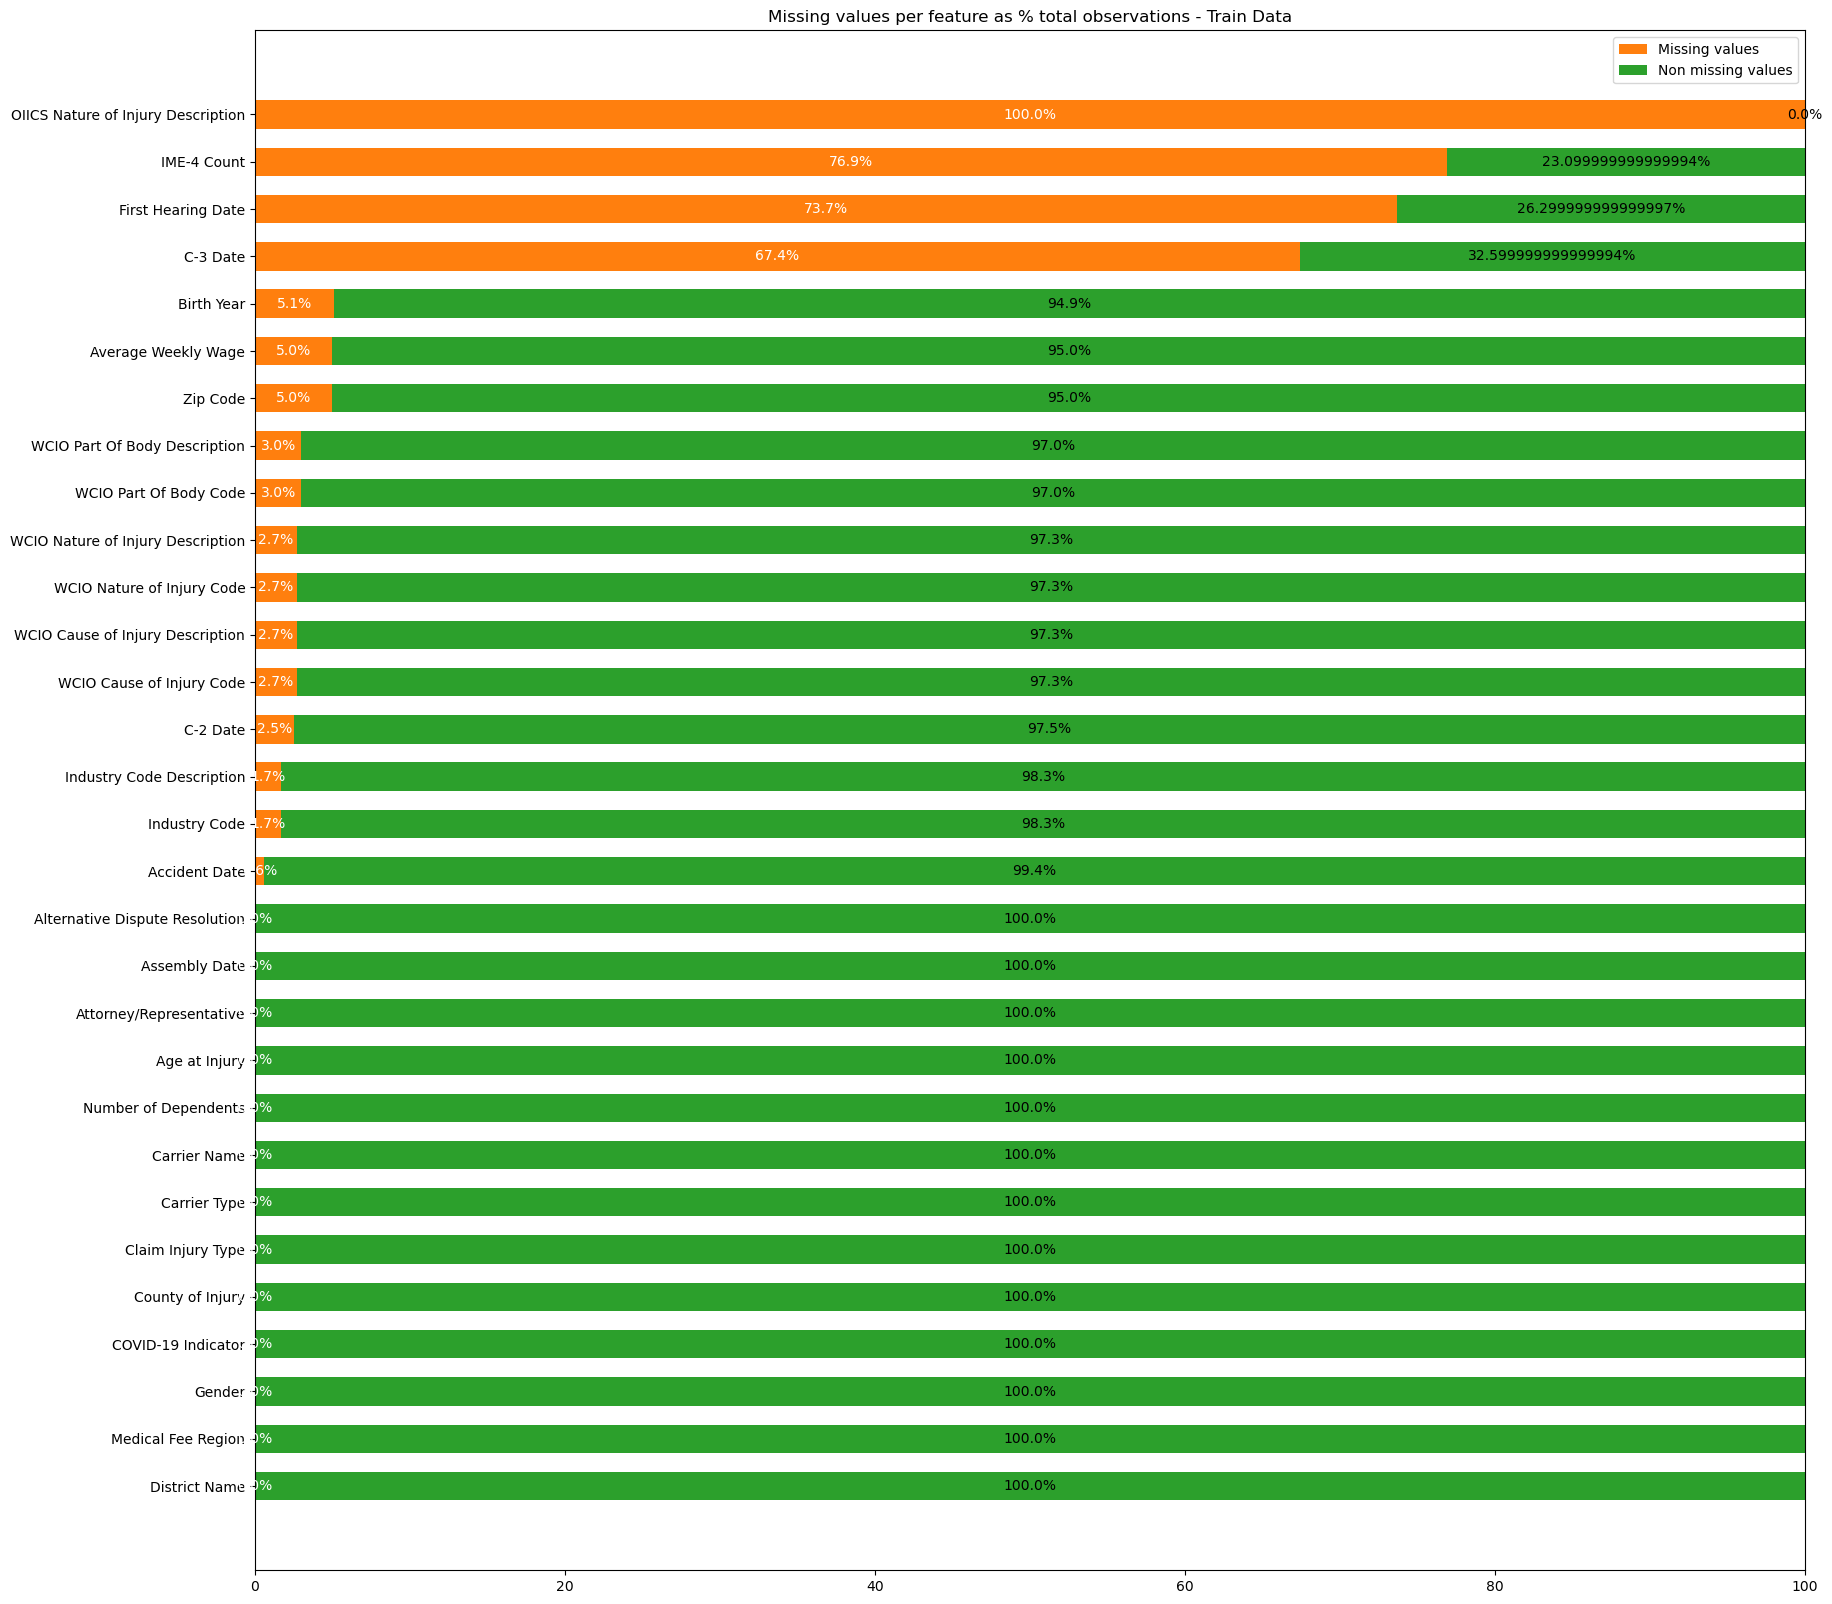

In [18]:
#visualization of missing values
percentage_missing = round((df_preprocess.isnull().sum() / df_preprocess.shape[0])*100,1)
percentage_missing.sort_values(ascending=True, inplace= True)

percentage_missing_df = pd.DataFrame({"missing_values_(%)": percentage_missing})
percentage_missing_df["present_values_(%)"] = abs(percentage_missing_df["missing_values_(%)"] - 100)
percentage_present = percentage_missing_df["present_values_(%)"]
column_names = list(percentage_missing.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names, width=percentage_missing, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names, width=percentage_present, height= 0.6, color="tab:green", left=percentage_missing, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations - Train Data")
plt.show()

In [19]:
print('Amount of missing values per column \n',df_test_preprocess.isna().sum())
print('\n Percentage of missing values per column \n',(df_test_preprocess.isna().sum()/len(df_test_preprocess))*100)

Amount of missing values per column 
 Accident Date                           2444
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    19204
Birth Year                             19470
C-2 Date                                9134
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                           352726
Industry Code                           7736
Industry Code Description               7736
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause of Inj

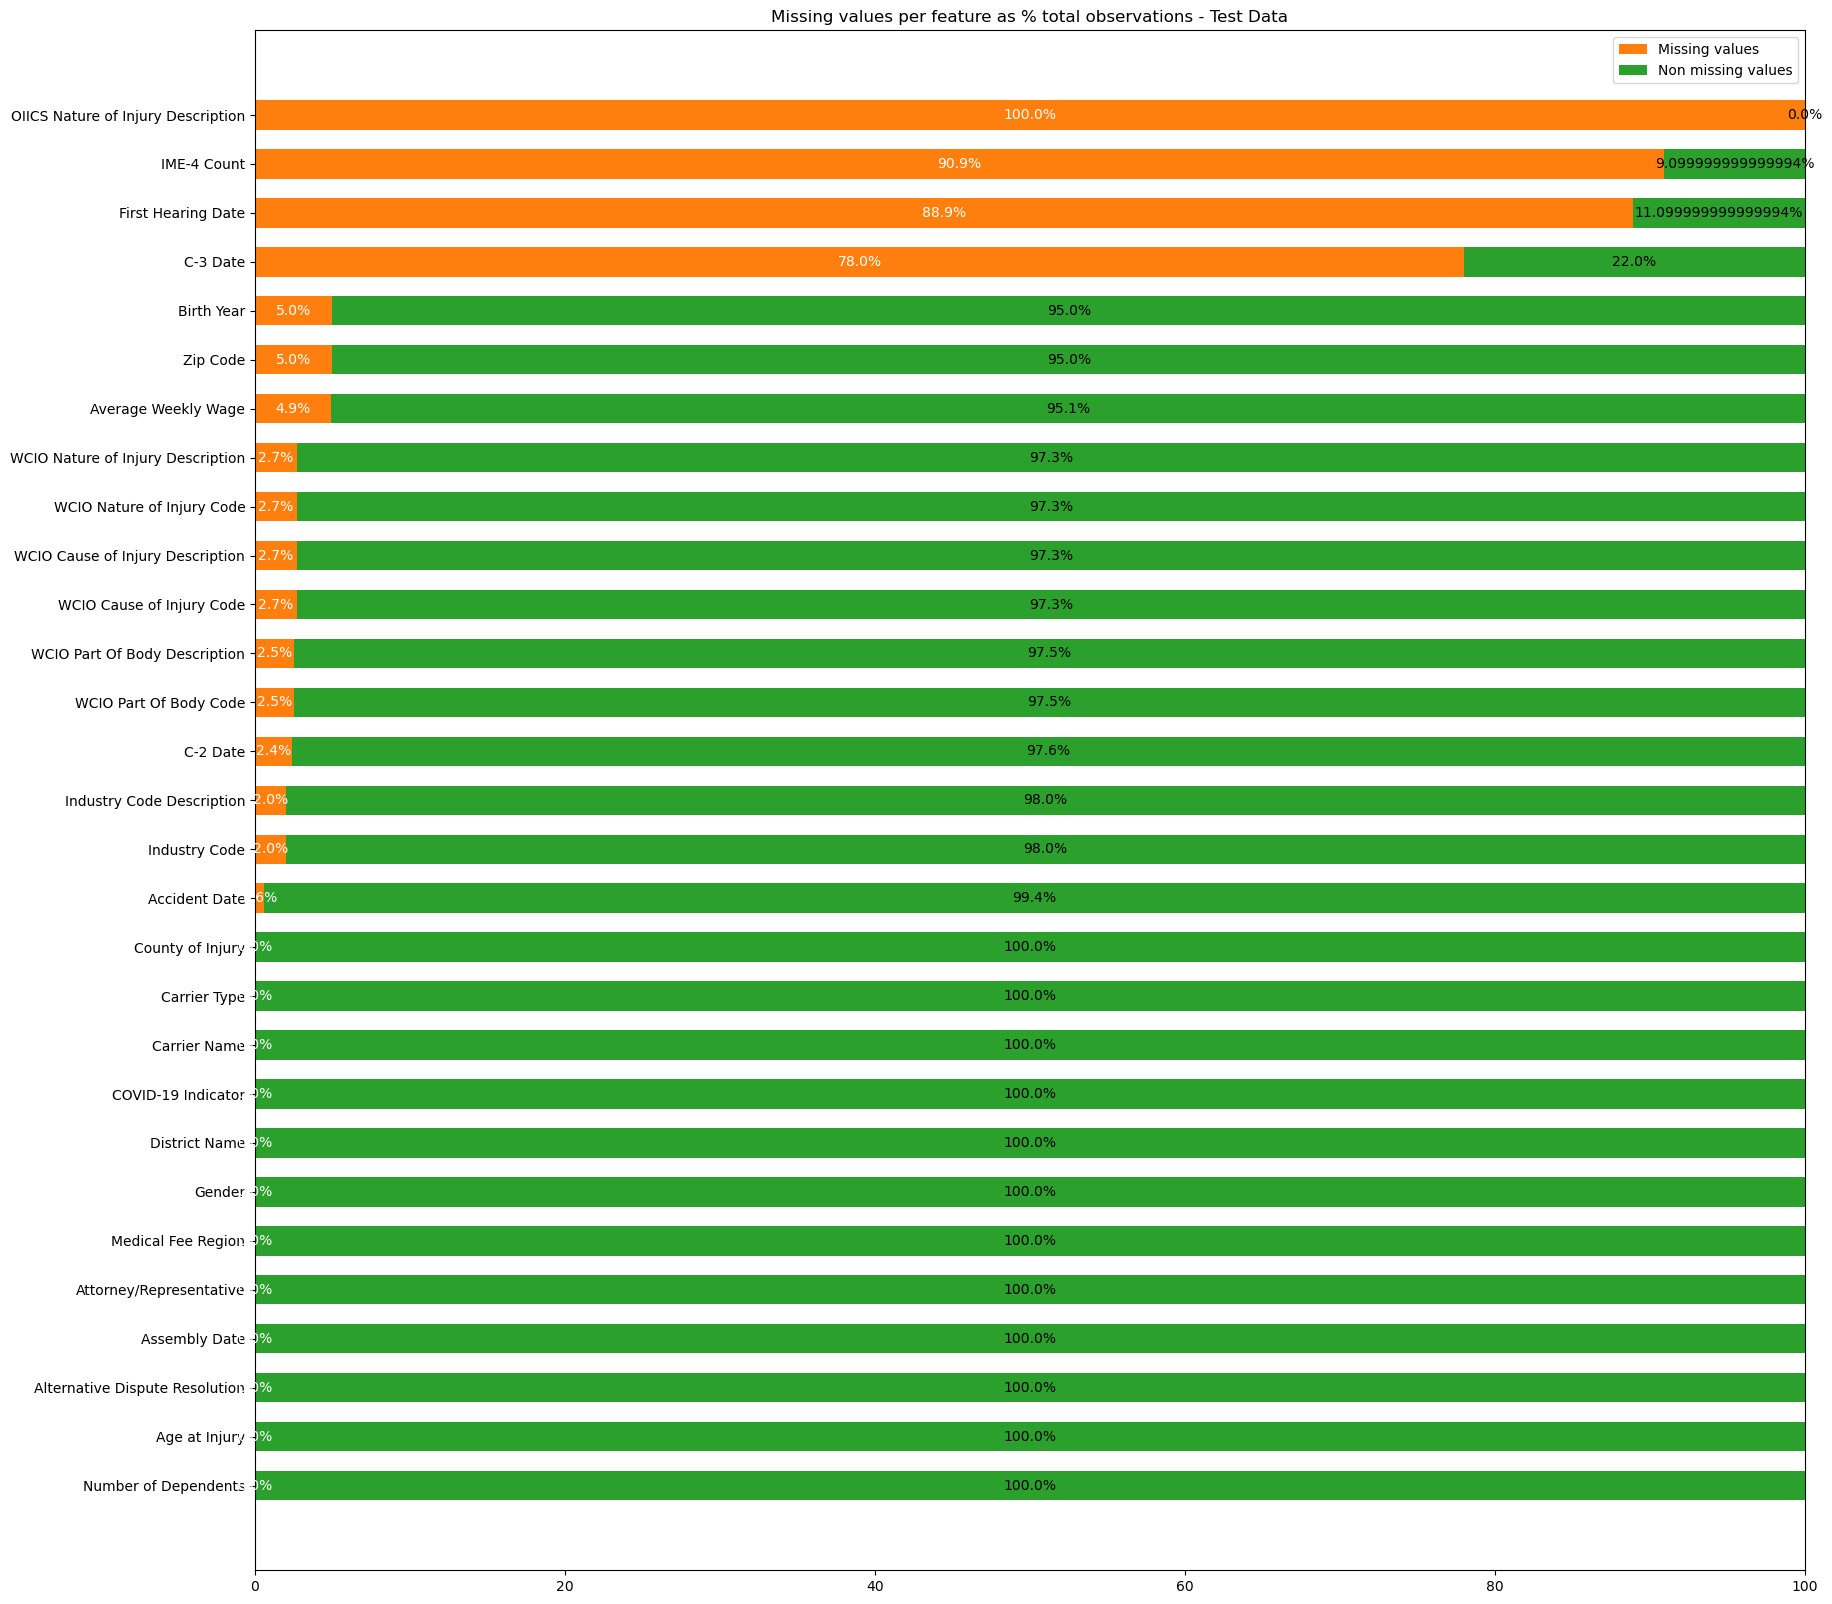

In [20]:
#visualization of missing values
percentage_missing_test = round((df_test_preprocess.isnull().sum() / df_test_preprocess.shape[0])*100,1)
percentage_missing_test.sort_values(ascending=True, inplace= True)

percentage_missing_df_test = pd.DataFrame({"missing_values_(%)": percentage_missing_test})
percentage_missing_df_test["present_values_(%)"] = abs(percentage_missing_df_test["missing_values_(%)"] - 100)
percentage_present_test = percentage_missing_df_test["present_values_(%)"]
column_names_test = list(percentage_missing_test.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names_test, width=percentage_missing_test, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names_test, width=percentage_present_test, height= 0.6, color="tab:green", left=percentage_missing_test, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing_test], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present_test], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations - Test Data")
plt.show()

The following features still have missing values (some hidden as 0s or other strange values):

- Accident Date
- Age at Injury
- Alternative Dispute Resolution
- Average Weekly Wage
- Birth Year
- C-2 Date
- C-3 Date
- First Hearing Date
- IME-4 Count
- Industry Code
- Industry Code Description
- OICCS Nature of Injury Description
- All WCIO features
- Zip Code

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="dtypes">
    
## 2.2. Adjusting Data Types
 
</a>

In [23]:
#changing Medical Fee Region to a numerical datatype
df_preprocess['Medical Fee Region'].replace('UK',0,inplace=True)
df_preprocess['Medical Fee Region'].replace('I',1,inplace=True)
df_preprocess['Medical Fee Region'].replace('II',2,inplace=True)
df_preprocess['Medical Fee Region'].replace('III',3,inplace=True)
df_preprocess['Medical Fee Region'].replace('IV',4,inplace=True)

In [24]:
#changing Medical Fee Region to a numerical datatype
df_test_preprocess['Medical Fee Region'].replace('UK',0,inplace=True)
df_test_preprocess['Medical Fee Region'].replace('I',1,inplace=True)
df_test_preprocess['Medical Fee Region'].replace('II',2,inplace=True)
df_test_preprocess['Medical Fee Region'].replace('III',3,inplace=True)
df_test_preprocess['Medical Fee Region'].replace('IV',4,inplace=True)

In [25]:
#Transforming our target variable into a numerical code, so the model can predict the severity
df_preprocess['Claim Injury Type'] = df_preprocess['Claim Injury Type'].map({ '1. CANCELLED': 1, '2. NON-COMP': 2,
                                                                 '3. MED ONLY': 3, '4. TEMPORARY': 4,
                                                                '5. PPD SCH LOSS': 5,'6. PPD NSL': 6,
                                                                '7. PTD': 7,'8. DEATH': 8}).astype(int)

In [26]:
# Converts input to datetime format, setting invalid parsing to NaT (Not a Time)
columns_to_convert = ['Accident Date', 'C-2 Date', 'C-3 Date', 'Assembly Date', 'First Hearing Date']
df_preprocess[columns_to_convert] = df_preprocess[columns_to_convert].apply(pd.to_datetime, errors='coerce')
df_test_preprocess[columns_to_convert] = df_test_preprocess[columns_to_convert].apply(pd.to_datetime, errors='coerce')

In [27]:
#transforming COVID-19 Indicator into binary
df_preprocess['COVID-19 Indicator'] = (df_preprocess['COVID-19 Indicator'] == 'Y').astype(int)
df_test_preprocess['COVID-19 Indicator'] = (df_test_preprocess['COVID-19 Indicator'] == 'Y').astype(int)

In [28]:
#transforming Attorney/Representative into binary
df_preprocess['Attorney/Representative'] = (df_preprocess['Attorney/Representative'] == 'Y').astype(int)
df_test_preprocess['Attorney/Representative'] = (df_test_preprocess['Attorney/Representative'] == 'Y').astype(int)

In [29]:
#reanalyzing datatypes
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Accident Date                       570337 non-null  datetime64[ns]
 1   Age at Injury                       574026 non-null  float64       
 2   Alternative Dispute Resolution      574026 non-null  object        
 3   Assembly Date                       574026 non-null  datetime64[ns]
 4   Attorney/Representative             574026 non-null  int64         
 5   Average Weekly Wage                 545375 non-null  float64       
 6   Birth Year                          544948 non-null  float64       
 7   C-2 Date                            559466 non-null  datetime64[ns]
 8   C-3 Date                            187245 non-null  datetime64[ns]
 9   Carrier Name                        574026 non-null  object        
 10  Carrie

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="split">
    
# 2.3. Train/Validation Split
 
</a>

In [31]:
#separating dependent variable from independent variables in our train data
X = df_preprocess.drop('Claim Injury Type', axis=1)
y = df_preprocess['Claim Injury Type']

In [32]:
#Doing the train test split to avoid data leakage when filling missing values
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify = y,
                                                    random_state=42)

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="preprocess">
    
# 2.4. Data Preprocessing
 
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="missing">
    
## 2.4.1. Missing Values
 
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="ad_missing">
    
## 2.4.1.1 Accident Date
 
</a>

We recall from the EDA that we have missing values in Accident Date. We will impute them with the median, as there are many low outliers which would influence the mean.

In [37]:
print(X_train['Accident Date'].isna().sum())
print(X_val['Accident Date'].isna().sum())
print(df_test_preprocess['Accident Date'].isna().sum())

2956
733
2444


In [38]:
median_acc_date = X_train['Accident Date'].median()
mean_acc_date = X_train['Accident Date'].mean()
print(median_acc_date)
print(mean_acc_date)

2021-06-27 00:00:00
2021-04-28 17:58:43.686286848


In [39]:
X_train['Accident Date'] = X_train['Accident Date'].fillna(median_acc_date)
X_val['Accident Date'] = X_val['Accident Date'].fillna(median_acc_date)
df_test_preprocess['Accident Date'] = df_test_preprocess['Accident Date'].fillna(median_acc_date)

In [40]:
print(X_train['Accident Date'].isna().sum())
print(X_val['Accident Date'].isna().sum())
print(df_test_preprocess['Accident Date'].isna().sum())

0
0
0


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="age_missing">
    
## 2.4.1.2 Age at Injury
 
</a>

In [42]:
print(X_train['Age at Injury'].isna().sum())
print(X_val['Age at Injury'].isna().sum())
print(df_test_preprocess['Age at Injury'].isna().sum())

0
0
0


As seen in the cell above, there are no visible missing values in the Age at Injury feature. From our individual feature analysis, however, we know Age at Injury has hidden missing values (0s) and ages below 14 which cannot be correct acording to the US minimum working age.  
  
We will impute these missing values with the difference between the year of the Accident Date and Birth Year.   
  
This doesn't fill all missing values; the rest we will impute using the median.

In [44]:
# viewing the hidden missing values and incorrect age values
X_train[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][X_train['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,
5567041,0.0,2021-06-27,1962.0,2020-10-06,2020-09-29
5705830,0.0,2021-03-20,0.0,NaT,2021-04-22
5947028,0.0,2020-11-04,0.0,NaT,2022-03-21
6078368,0.0,2021-06-27,1957.0,2022-09-19,2022-09-08
5564102,0.0,2021-06-27,1958.0,2020-10-07,2020-09-23
...,...,...,...,...,...
5992939,0.0,2021-06-27,1958.0,2022-05-31,2022-05-17
6110387,0.0,2021-06-27,1967.0,2022-11-03,2022-10-18
5854201,0.0,2021-06-27,1961.0,2021-11-18,2021-11-10


In [45]:
#viewing problem rows in validation
X_val[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][X_val['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,
5491098,0.0,2021-06-27,1989.0,NaT,2020-06-03
5497389,0.0,2021-06-27,1963.0,2020-06-24,2020-06-12
5699732,0.0,2021-06-27,1959.0,NaT,2021-04-14
5963472,0.0,2021-06-27,NaN,NaT,2022-04-09
5791445,0.0,2020-08-25,0.0,NaT,2021-08-19
...,...,...,...,...,...
5703060,0.0,2021-06-27,1962.0,2021-04-22,2021-04-20
5686957,0.0,2020-12-07,0.0,NaT,2021-03-25
5618680,0.0,2020-12-09,0.0,2020-12-10,2020-12-16


In [46]:
#viewing problem rows in test df
df_test_preprocess[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][df_test_preprocess['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,
6166895,0,2022-12-19,1904.0,2023-01-03,2023-01-03
6165903,0,2021-06-27,1968.0,NaT,2023-01-03
6165728,0,2021-06-27,1966.0,2023-01-06,2023-01-03
6165708,0,2021-06-27,0.0,2023-01-10,2023-01-03
6166475,0,2021-06-27,1963.0,NaT,2023-01-04
...,...,...,...,...,...
6553142,0,2021-06-27,1987.0,NaT,2024-06-05
6553893,0,2021-06-27,1970.0,NaT,2024-06-05
6553546,0,2021-06-27,1980.0,NaT,2024-06-05


In [47]:
# Recalculate 'Age at Injury' where the condition is met
age_condition = (
    (X_train['Age at Injury'] <= 14) &
    X_train['Birth Year'].notna() &
    (X_train['Birth Year'] != 0) &
    X_train['Accident Date'].notna()
)

# Calculate precise age (Accident Date year - Birth Year)
X_train.loc[age_condition, 'Age at Injury'] = X_train.loc[age_condition, 'Accident Date'].dt.year - X_train.loc[age_condition, 'Birth Year']

# Repeat the process for validation data
age_condition_val = (
    (X_val['Age at Injury'] <= 14) &
    X_val['Birth Year'].notna() &
    (X_val['Birth Year'] != 0) &
    X_val['Accident Date'].notna()
)

X_val.loc[age_condition_val, 'Age at Injury'] = X_val.loc[age_condition_val, 'Accident Date'].dt.year - X_val.loc[age_condition_val, 'Birth Year']

# Repeat once more for the test df
age_condition_test = (
    (df_test_preprocess['Age at Injury'] <= 14) &
    df_test_preprocess['Birth Year'].notna() &
    (df_test_preprocess['Birth Year'] != 0) &
    df_test_preprocess['Accident Date'].notna()
)

df_test_preprocess.loc[age_condition_test, 'Age at Injury'] = df_test_preprocess.loc[age_condition_test, 'Accident Date'].dt.year - df_test_preprocess.loc[age_condition_test, 'Birth Year']



In [48]:
# checking to see if the hidden missing values have been solved
X_train[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][X_train['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,
5705830,0.0,2021-03-20,0.0,NaT,2021-04-22
5947028,0.0,2020-11-04,0.0,NaT,2022-03-21
5923586,0.0,2021-06-27,0.0,2022-07-23,2022-02-17
5778823,0.0,2021-07-28,0.0,2021-08-02,2021-08-02
5634589,0.0,2021-06-27,0.0,2021-03-02,2021-01-13
...,...,...,...,...,...
5887774,0.0,2021-12-30,0.0,2021-12-30,2021-12-30
5896497,0.0,2022-01-05,0.0,2022-01-11,2022-01-11
5704029,0.0,2021-03-24,0.0,2021-05-03,2021-04-21


Not all hidden missing values have been removed, so we will repeat the process using assembly date instead. There are no missing values for assembly date, so this should help fill more rows. We recognize that this provides a slightly less accurate representation of Age at Injury, but it likely accurate with 1 to 3 years.

In [50]:
# Recalculate 'Age at Injury' where the condition is met
age_condition_assembly = (
    (X_train['Age at Injury'] <= 14) &
    X_train['Birth Year'].notna() &
    (X_train['Birth Year'] != 0) &
    X_train['Assembly Date'].notna()
)

# Calculate precise age (Accident Date year - Birth Year)
X_train.loc[age_condition_assembly, 'Age at Injury'] = X_train.loc[age_condition_assembly, 'Assembly Date'].dt.year - X_train.loc[age_condition_assembly, 'Birth Year']

# Repeat the process for validation data
age_condition_assembly_val = (
    (X_val['Age at Injury'] <= 14) &
    X_val['Birth Year'].notna() &
    (X_val['Birth Year'] != 0) &
    X_val['Assembly Date'].notna()
)

X_val.loc[age_condition_assembly_val, 'Age at Injury'] = X_val.loc[age_condition_assembly_val, 'Assembly Date'].dt.year - X_val.loc[age_condition_assembly_val, 'Birth Year']

# Repeat once more for the test df
age_condition_assembly_test = (
    (df_test_preprocess['Age at Injury'] <= 14) &
    df_test_preprocess['Birth Year'].notna() &
    (df_test_preprocess['Birth Year'] != 0) &
    df_test_preprocess['Assembly Date'].notna()
)

df_test_preprocess.loc[age_condition_assembly_test, 'Age at Injury'] = df_test_preprocess.loc[age_condition_assembly_test, 'Assembly Date'].dt.year - df_test_preprocess.loc[age_condition_assembly_test, 'Birth Year']



In [51]:
# checking to see if the hidden missing values have been solved
X_train[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][X_train['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,
5705830,0.0,2021-03-20,0.0,NaT,2021-04-22
5947028,0.0,2020-11-04,0.0,NaT,2022-03-21
5923586,0.0,2021-06-27,0.0,2022-07-23,2022-02-17
5778823,0.0,2021-07-28,0.0,2021-08-02,2021-08-02
5634589,0.0,2021-06-27,0.0,2021-03-02,2021-01-13
...,...,...,...,...,...
5887774,0.0,2021-12-30,0.0,2021-12-30,2021-12-30
5896497,0.0,2022-01-05,0.0,2022-01-11,2022-01-11
5704029,0.0,2021-03-24,0.0,2021-05-03,2021-04-21


In [52]:
#viewing problem rows in validation
X_val[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][X_val['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,
5963472,0.0,2021-06-27,NaN,NaT,2022-04-09
5791445,0.0,2020-08-25,0.0,NaT,2021-08-19
5830714,0.0,2021-10-01,NaN,2021-10-08,2021-10-08
5569961,0.0,2020-09-26,0.0,2020-10-01,2020-10-01
5444470,0.0,2020-03-04,0.0,2020-03-05,2020-03-05
...,...,...,...,...,...
5937384,0.0,2021-06-27,0.0,2022-03-21,2022-03-08
6049811,0.0,2022-05-22,0.0,2022-08-01,2022-08-01
5718895,0.0,2006-04-12,0.0,NaT,2021-05-12


In [53]:
#viewing problem rows in test df
df_test_preprocess[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][df_test_preprocess['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,
6165708,0,2021-06-27,0.0,2023-01-10,2023-01-03
6168264,0,2022-12-15,0.0,2023-05-02,2023-01-06
6168395,0,2022-11-16,0.0,2023-01-06,2023-01-06
6168837,0,2022-12-27,0.0,2023-01-06,2023-01-06
6168985,0,2021-06-27,0.0,NaT,2023-01-06
...,...,...,...,...,...
6553028,5,2024-05-30,2019.0,2024-06-03,2024-06-03
6552697,0,2024-04-26,0.0,NaT,2024-06-04
6553201,0,2021-06-27,NaN,NaT,2024-06-05


Using this imputation, we were able to reduce the numbers of hidden missing values in Age at Injury in train, validation, and test data:  
- Train: From 4346 missing values to 1787
- Val: From 1098 missing values to 468
- Test: From 3137 missing values to 1022

The rest of these hidden missing values we will fill using the median. As seen below, mean and median (ignoring age values of 0) are almost identical.

In [55]:
age_median = X_train['Age at Injury'][X_train['Age at Injury'] != 0].median()
age_mean = X_train['Age at Injury'][X_train['Age at Injury'] != 0].mean()

In [56]:
print(age_median)
print(age_mean)

42.0
42.587824737423084


In [57]:
X_train.loc[X_train['Age at Injury'] <=14, 'Age at Injury'] = age_median
X_val.loc[X_val['Age at Injury'] <=14, 'Age at Injury'] = age_median
df_test_preprocess.loc[df_test_preprocess['Age at Injury'] <=14, 'Age at Injury'] = age_median

In [58]:
# checking to see if the hidden missing values have been solved
X_train[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][X_train['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,


In [59]:
# checking to see if the hidden missing values have been solved
X_val[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][X_val['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,


In [60]:
# checking to see if the hidden missing values have been solved
df_test_preprocess[['Age at Injury','Accident Date','Birth Year','C-2 Date', 'Assembly Date']][df_test_preprocess['Age at Injury'] <= 14]

,Age at Injury,Accident Date,Birth Year,C-2 Date,Assembly Date
Claim Identifier,,,,,


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="adr_missing">
    
## 2.4.1.3 Alternative Dispute Resolution
 
</a>

In the EDA, we identified 5 unknown values in the test data and 1 unknown value in the train data. We will change these to the mode (No), so that we may turn this feature into a binary one.

In [63]:
X_train.loc[X_train['Alternative Dispute Resolution'] == 'U', 'Alternative Dispute Resolution'] = 'N'
X_val.loc[X_val['Alternative Dispute Resolution'] == 'U', 'Alternative Dispute Resolution'] = 'N'
df_test_preprocess.loc[df_test_preprocess['Alternative Dispute Resolution'] == 'U', 'Alternative Dispute Resolution'] = 'N'

In [64]:
X_train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    457137
Y      2083
Name: count, dtype: int64

In [65]:
X_val['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    114280
Y       526
Name: count, dtype: int64

In [66]:
df_test_preprocess['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    386315
Y      1660
Name: count, dtype: int64

In [67]:
#we can now turn this feature into a binary one
X_train['Alternative Dispute Resolution'] = (X_train['Alternative Dispute Resolution'] == 'Y').astype(int)
X_val['Alternative Dispute Resolution'] = (X_val['Alternative Dispute Resolution'] == 'Y').astype(int)
df_test_preprocess['Alternative Dispute Resolution'] = (df_test_preprocess['Alternative Dispute Resolution'] == 'Y').astype(int)


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="aww_missing">
    
## 2.4.1.4 Average Weekly Wage
 
</a>

From the EDA, we know the follow about Average Weekly Wage:  
- Has some traditional missing values. We will fill these with the median, as there are many high outliers.
- Has a very high presence of 0 values. This feature is defined as 'the wage used to calculate the workers' compensation, disability, or an Paid Leave wage replacement benefits.' Therefore, this wage cannot be 0, or the worker would not  be receiving any compensation. 0s account for around 50% of the data in our training dataset, and nearly 80% in test data. As we know from the previous handout, Average Weekly Wage scores highly on feature selection. Therefore, we will not drop the values in this column, but will fill them with the median. Before doing this, we will create a binary feature that indicates whether or not the wage value was present originally, in case this has an effect on our target feature.

In [70]:
##beginning with traditional missing values
print(X_train['Average Weekly Wage'].isna().sum())
print(X_val['Average Weekly Wage'].isna().sum())
print(df_test_preprocess['Average Weekly Wage'].isna().sum())

22976
5675
19204


In [71]:
#missing values as percentages
print(X_train['Average Weekly Wage'].isna().sum() / (len(X_train['Average Weekly Wage'])) * 100)
print(X_val['Average Weekly Wage'].isna().sum() / (len(X_val['Average Weekly Wage'])) * 100)
print(df_test_preprocess['Average Weekly Wage'].isna().sum() / (len(df_test_preprocess['Average Weekly Wage'])) * 100)

5.00326640825748
4.943121439646012
4.949803466718217


In [72]:
#caclulating average weekly wage (ignoring 0 values, as there are many)
avg_weekly_wage_median = X_train['Average Weekly Wage'][X_train['Average Weekly Wage'] != 0].median()
print(avg_weekly_wage_median)

1070.12


In [73]:
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(avg_weekly_wage_median)
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].fillna(avg_weekly_wage_median)
df_test_preprocess['Average Weekly Wage'] = df_test_preprocess['Average Weekly Wage'].fillna(avg_weekly_wage_median)

In [74]:
print(X_train['Average Weekly Wage'].isna().sum())
print(X_val['Average Weekly Wage'].isna().sum())
print(df_test_preprocess['Average Weekly Wage'].isna().sum())

0
0
0


In [75]:
#RUN THIS CELL ONLY ONCE
#creating the binary wage feature
X_train['Non-Zero Wage'] = (X_train['Average Weekly Wage'] != 0).astype(int)
X_val['Non-Zero Wage'] = (X_val['Average Weekly Wage'] != 0).astype(int)
df_test_preprocess['Non-Zero Wage'] = (df_test_preprocess['Average Weekly Wage'] != 0).astype(int)

In [76]:
#checking to make sure it worked
X_train[['Average Weekly Wage', 'Non-Zero Wage']]

,Average Weekly Wage,Non-Zero Wage
Claim Identifier,,
5785935,744.06,1
6090033,845.29,1
6136197,0.00,0
6019545,0.00,0
5792247,668.08,1
...,...,...
5837651,1244.56,1
5781926,969.26,1
5890060,794.09,1


In [77]:
X_train.loc[X_train['Average Weekly Wage'] == 0, 'Average Weekly Wage'] = avg_weekly_wage_median
X_val.loc[X_val['Average Weekly Wage'] == 0, 'Average Weekly Wage'] = avg_weekly_wage_median
df_test_preprocess.loc[df_test_preprocess['Average Weekly Wage'] == 0, 'Average Weekly Wage'] = avg_weekly_wage_median

In [78]:
X_train.loc[X_train['Average Weekly Wage'] == 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [79]:
X_val.loc[X_val['Average Weekly Wage'] == 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [80]:
df_test_preprocess
df_test_preprocess.loc[df_test_preprocess['Average Weekly Wage'] == 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


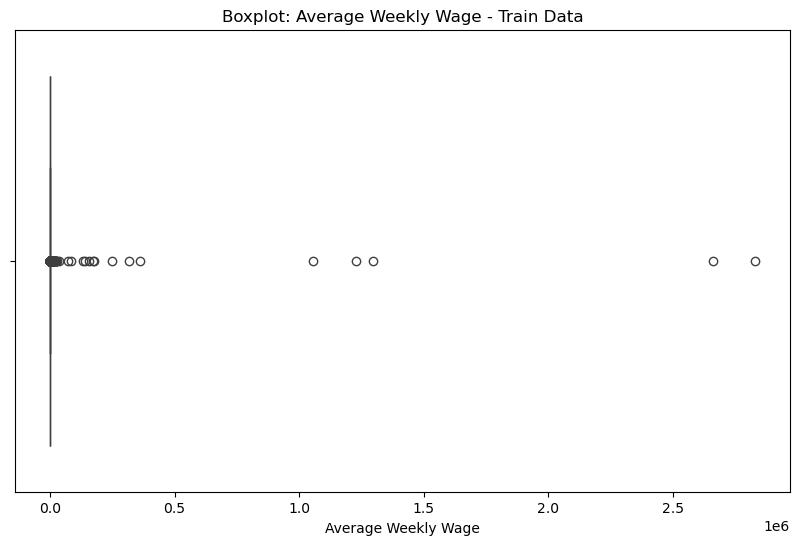

In [81]:
# Boxplot for visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Average Weekly Wage'])
plt.title('Boxplot: Average Weekly Wage - Train Data')
plt.xlabel('Average Weekly Wage')
plt.show()

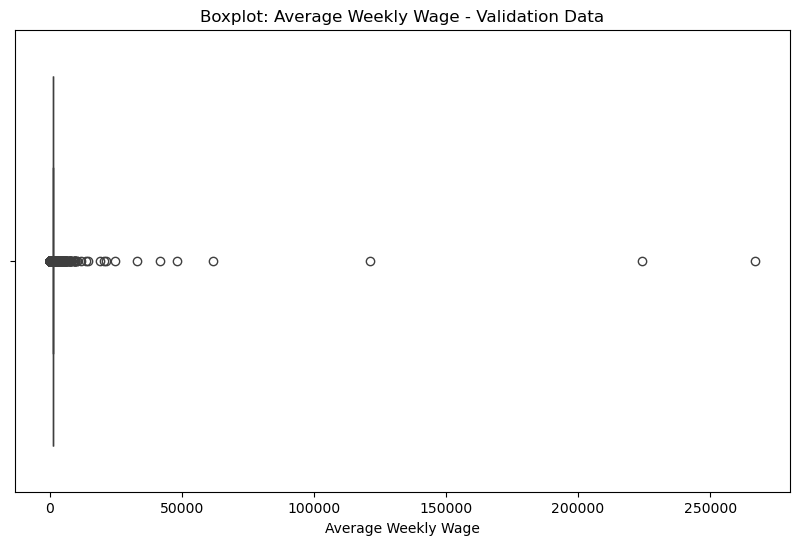

In [82]:
# Boxplot for visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_val['Average Weekly Wage'])
plt.title('Boxplot: Average Weekly Wage - Validation Data')
plt.xlabel('Average Weekly Wage')
plt.show()

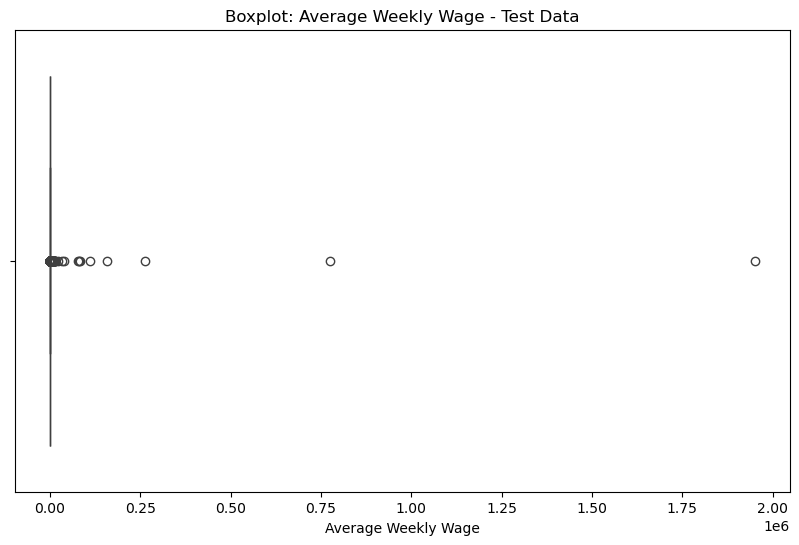

In [83]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_preprocess['Average Weekly Wage'])
plt.title('Boxplot: Average Weekly Wage - Test Data')
plt.xlabel('Average Weekly Wage')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="by_missing">
    
## 2.4.1.5 Birth Year
 
</a>

We know Birth Year has conventional missing values, as well as hidden missing values that appear as 0s. We will impute as many values as we can using Age at Injury and Accident Date.

In [86]:
X_train.loc[X_train['Birth Year'] == 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6019545,2020-09-02,55.0,0,2022-06-21,0,1070.12,0.0,2022-06-21,2022-03-16,NEW HAMPSHIRE INSURANCE CO,...,NaN,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,08904,2.0,0
5657872,2021-02-10,65.0,0,2021-02-12,0,1070.12,0.0,2021-02-12,NaT,CHAMPLAIN VALLEY PHYSICIANS,...,NaN,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,12975,1.0,0
5705830,2021-03-20,42.0,0,2021-04-22,1,1070.12,0.0,NaT,2021-04-13,SAFETY NATIONAL CASUALTY CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11590,2.0,0
5928975,2021-04-28,23.0,0,2022-02-23,0,1070.12,0.0,2022-02-23,NaT,NEW HAMPSHIRE INSURANCE CO,...,NaN,85.0,ANIMAL OR INSECT,43.0,PUNCTURE,35.0,HAND,10005,1.0,0
5644354,2021-01-19,41.0,0,2021-01-26,0,1070.12,0.0,2021-01-25,NaT,INDEMNITY INS. OF N AMERICA,...,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,56.0,FOOT,05257,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671466,2021-02-26,58.0,0,2021-03-03,1,1070.12,0.0,2021-03-03,NaT,STATE INSURANCE FUND,...,NaN,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,32174,0.0,0
5600894,2020-10-21,38.0,0,2020-11-16,1,767.46,0.0,2020-11-16,2020-12-16,VIGILANT INSURANCE COMPANY,...,NaN,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,30319,5.0,1
5935392,2021-10-28,42.0,0,2022-03-05,0,1070.12,0.0,2022-03-04,2022-03-14,CHATHAM CSD,...,NaN,33.0,ON STAIRS,10.0,CONTUSION,38.0,SHOULDER(S),12136,6.0,1


In [87]:
print(X_train['Birth Year'].isna().sum())
print(X_val['Birth Year'].isna().sum())
print(df_test_preprocess['Birth Year'].isna().sum())

23242
5836
19470


In [88]:
# Handle missing values or 0s in 'Birth Year' by imputing with the difference between Accident Date and Age at Injury - train data
X_train.loc[X_train['Birth Year'].isna() | (X_train['Birth Year'] == 0), 'Birth Year'] = (
    X_train.loc[X_train['Birth Year'].isna() | (X_train['Birth Year'] == 0), 'Accident Date'].dt.year - X_train['Age at Injury']
)


# repeating for validation data
X_val.loc[X_val['Birth Year'].isna() | (X_val['Birth Year'] == 0), 'Birth Year'] = (
    X_val.loc[X_val['Birth Year'].isna() | (X_val['Birth Year'] == 0), 'Accident Date'].dt.year - X_val['Age at Injury']
)

# and finally for test data
df_test_preprocess.loc[df_test_preprocess['Birth Year'].isna() | (df_test_preprocess['Birth Year'] == 0), 'Birth Year'] = (
    df_test_preprocess.loc[df_test_preprocess['Birth Year'].isna() | (df_test_preprocess['Birth Year'] == 0), 'Accident Date'].dt.year - df_test_preprocess['Age at Injury']
)

In [89]:
print(X_train['Birth Year'].isna().sum())
print(X_val['Birth Year'].isna().sum())
print(df_test_preprocess['Birth Year'].isna().sum())

0
0
0


In [90]:
X_train.loc[X_train['Birth Year'] == 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="c2_missing">
    
## 2.4.1.6 C-2 Date
 
</a>

C-2 Date has some traditional missing values - we will impute these by finding the average difference between C-2 date and Assembly date, then subtracting the average from Assembly Date.

In [93]:
print(X_train['C-2 Date'].isna().sum())
print(X_val['C-2 Date'].isna().sum())
print(df_test_preprocess['C-2 Date'].isna().sum())

11635
2925
9134


In [94]:
c2_assembly_diff = X_train['Assembly Date'] - X_train['C-2 Date'].dropna()

In [95]:
print(c2_assembly_diff)

Claim Identifier
5393066   0 days
5393091   0 days
5393667   0 days
5393769      NaT
5393770   0 days
           ...  
6165679   0 days
6165680   0 days
6165681   0 days
6165684   0 days
6165685   0 days
Length: 459220, dtype: timedelta64[ns]


In [96]:
c2_assembly_avg_diff = c2_assembly_diff.mean()
print(c2_assembly_avg_diff)

3 days 22:32:49.883709239


In [97]:
X_train['C-2 Date'] = X_train['C-2 Date'].fillna(X_train['Assembly Date'] - c2_assembly_avg_diff)
X_val['C-2 Date'] = X_val['C-2 Date'].fillna(X_val['Assembly Date'] - c2_assembly_avg_diff)
df_test_preprocess['C-2 Date'] = df_test_preprocess['C-2 Date'].fillna(df_test_preprocess['Assembly Date'] - c2_assembly_avg_diff)

In [98]:
print(X_train['C-2 Date'].isna().sum())
print(X_val['C-2 Date'].isna().sum())
print(df_test_preprocess['C-2 Date'].isna().sum())

0
0
0


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="c3_missing">
    
## 2.4.1.7 C-3 Date
 
</a>

This feature is the date of which the C-3 form (Employee Claim Form) was received.
Because there are many missing values in the C-3 Date, we assumed the form was never received. So we decided to turn this variable into a binary one.

In [101]:
##ONLY RUN THIS CELL ONCE
# Convert 'C-3 Date' to binary, 1 for date present, 0 for NaN
X_train['C-3 Date'] = X_train['C-3 Date'].apply(lambda x: 1 if pd.notna(x) else 0)
X_val['C-3 Date'] = X_val['C-3 Date'].apply(lambda x: 1 if pd.notna(x) else 0)
df_test_preprocess['C-3 Date'] = df_test_preprocess['C-3 Date'].apply(lambda x: 1 if pd.notna(x) else 0)

# Verify the transformation
print(X_train[['C-3 Date']].head(10))  # Should show 1 where date exists, 0 where NaN
print(X_val[['C-3 Date']].head(10))
print(df_test_preprocess[['C-3 Date']].head(10))

                  C-3 Date
Claim Identifier          
5785935                  1
6090033                  1
6136197                  0
6019545                  1
5792247                  1
5522905                  0
5567041                  1
5565290                  1
5719790                  0
5812021                  1
                  C-3 Date
Claim Identifier          
5947783                  1
6150876                  0
5397365                  0
6077399                  1
5945251                  0
5737625                  0
5641757                  0
5702107                  0
5521323                  1
5565472                  1
                  C-3 Date
Claim Identifier          
6165911                  0
6166141                  0
6165907                  0
6166047                  0
6166102                  0
6165787                  0
6166019                  0
6166080                  0
6165976                  0
6165953                  1


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="fhd_missing">
    
## 2.4.1.8 First Hearing Date
 
</a>

Because there are so many missing values in First Hearing Date (nearly 75%), we assume a blank date means the claim has not yet had a hearing held. As this is the case, we decided to turn 'First Hearing Date' into a binary variables, 0: First Hearing not held and 1: First hearing held.

In [104]:
# RUN THIS CELL ONLY ONCE
# Convert 'First Hearing Date' to numerical code: NaN = 0, Date = 1
X_train['First Hearing Date'] = X_train['First Hearing Date'].apply(lambda x: 1 if pd.notna(x) else 0).astype(int)
X_val['First Hearing Date'] = X_val['First Hearing Date'].apply(lambda x: 1 if pd.notna(x) else 0).astype(int)
df_test_preprocess['First Hearing Date'] = df_test_preprocess['First Hearing Date'].apply(lambda x: 1 if pd.notna(x) else 0).astype(int)

In [105]:
# Verify the transformation
print(X_train[['First Hearing Date']].head(10))  # Should show 1 where date exists, 0 where NaN
print(X_val[['First Hearing Date']].head(10))
print(df_test_preprocess[['First Hearing Date']].head(10))

                  First Hearing Date
Claim Identifier                    
5785935                            0
6090033                            1
6136197                            0
6019545                            0
5792247                            1
5522905                            0
5567041                            0
5565290                            1
5719790                            0
5812021                            0
                  First Hearing Date
Claim Identifier                    
5947783                            0
6150876                            1
5397365                            0
6077399                            1
5945251                            0
5737625                            0
5641757                            0
5702107                            0
5521323                            1
5565472                            0
                  First Hearing Date
Claim Identifier                    
6165911                            0
6

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="ime4_missing">
    
## 2.4.1.9 IME-4 Count
 
</a>

We know from the EDA that IME-4 Count has no values of 0. We presume that the nulls are present in the dataset because the claim didn't receive any IME-4 forms. Therefore, we will impute the missing values with 0.

In [108]:
# Fill NaNs with 0s
X_train['IME-4 Count'].fillna(0, inplace=True)
X_val['IME-4 Count'].fillna(0, inplace=True)
df_test_preprocess['IME-4 Count'].fillna(0, inplace=True)

In [109]:
print(X_train['IME-4 Count'].isna().sum())
print(X_val['IME-4 Count'].isna().sum())
print(df_test_preprocess['IME-4 Count'].isna().sum())

0
0
0


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="icid_missing">
    
## 2.4.1.10 Industry Code an Industry Code Description
 
</a>

For the missing values in the Industry code we decided to fill with the mode of industry code in each row's 'County of Injury'. The rationale is that areas that are geographically near one another often have similar industires. For example, cities often tend to have more industry/factory jobs, rural areas tend to have more agricultural jobs, and so on.

In [112]:
print(X_train['Industry Code'].isna().sum())
print(X_val['Industry Code'].isna().sum())
print(df_test_preprocess['Industry Code'].isna().sum())

7976
1982
7736


In [113]:
# Dictionary with the Counties and the most common 'Industry Code'
industry_by_county = (
    X_train.groupby('County of Injury')['Industry Code']
    .agg(lambda x: x.mode().iloc[0]).to_dict())

#Fill the nulls

X_train['Industry Code'] = X_train.apply(
    lambda row: industry_by_county.get(row['County of Injury'], row['Industry Code']) 
    if pd.isnull(row['Industry Code']) else row['Industry Code'], axis=1)
# need to fill test nulls with most common from TRAIN
X_val['Industry Code'] = X_val.apply(
    lambda row: industry_by_county.get(row['County of Injury'], row['Industry Code']) 
    if pd.isnull(row['Industry Code']) else row['Industry Code'], axis=1)
df_test_preprocess['Industry Code'] = df_test_preprocess.apply(
    lambda row: industry_by_county.get(row['County of Injury'], row['Industry Code']) 
    if pd.isnull(row['Industry Code']) else row['Industry Code'], axis=1)

In [114]:
print(X_train['Industry Code'].isna().sum())
print(X_val['Industry Code'].isna().sum())
print(df_test_preprocess['Industry Code'].isna().sum())

0
0
0


In [115]:
#We don't deal with the missing values in the description because we will be dropping the description
#and keeping the dictionary we create so we can access the descriptions when needed
print(X_train['Industry Code Description'].isna().sum())
print(X_val['Industry Code Description'].isna().sum())
print(df_test_preprocess['Industry Code Description'].isna().sum())

7976
1982
7736


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="oiics_missing">
    
## 2.4.1.11 OIICS Nature of Injury Description
 
</a>

We will drop this entire variable, as it is entirely NA values.

In [118]:
X_train.drop('OIICS Nature of Injury Description', axis = 1, inplace = True)
X_val.drop('OIICS Nature of Injury Description', axis = 1, inplace = True)
df_test_preprocess.drop('OIICS Nature of Injury Description', axis = 1, inplace = True)

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="wcio_missing">
    
## 2.4.1.12 WCIO features
 
</a>

For each set of WCIO features (Nature of Injury, Cause of Injury, Part of Body), we will create broader categories that contain related values from each feature. Doing so reduces the high dimensionality of these features. Missing values in each feature are placed into an 'Unknown' category. See Feature Engineering Section for more detail.

We will replace NA values in the WCIO feature Code columns, so that we can include them in the correlation matrices, in case they are better predicters of our target than the features we engineer. Below, we will encode NA values with code 0.

In [122]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].fillna(0)
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].fillna(0)
df_test_preprocess['WCIO Part Of Body Code'] = df_test_preprocess['WCIO Part Of Body Code'].fillna(0)

In [123]:
print(X_train['WCIO Part Of Body Code'].isna().sum())
print(X_val['WCIO Part Of Body Code'].isna().sum())
print(df_test_preprocess['WCIO Part Of Body Code'].isna().sum())

0
0
0


In [124]:
X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].fillna(0)
X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].fillna(0)
df_test_preprocess['WCIO Nature of Injury Code'] = df_test_preprocess['WCIO Nature of Injury Code'].fillna(0)

In [125]:
print(X_train['WCIO Nature of Injury Code'].isna().sum())
print(X_val['WCIO Nature of Injury Code'].isna().sum())
print(df_test_preprocess['WCIO Nature of Injury Code'].isna().sum())

0
0
0


In [126]:
X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].fillna(0)
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].fillna(0)
df_test_preprocess['WCIO Cause of Injury Code'] = df_test_preprocess['WCIO Cause of Injury Code'].fillna(0)

In [127]:
print(X_train['WCIO Cause of Injury Code'].isna().sum())
print(X_val['WCIO Cause of Injury Code'].isna().sum())
print(df_test_preprocess['WCIO Cause of Injury Code'].isna().sum())

0
0
0


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="zip_missing">
    
## 2.4.1.13 Zip Code
 
</a>

We decided to drop the entire 'Zip Code' column because it has high dimensionality, values that don't make sense, and we have other regional variables

In [130]:
X_train.drop(columns=['Zip Code'], inplace=True)
X_val.drop(columns=['Zip Code'], inplace=True)
df_test_preprocess.drop(columns=['Zip Code'], inplace=True)

### 2.4.1.13 Remaining NA Values <a class="anchor" id="remaining_missing"></a>

In [132]:
X_train.isna().sum()

Accident Date                            0
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                      0
Birth Year                               0
C-2 Date                                 0
C-3 Date                                 0
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                       0
Gender                                   0
IME-4 Count                              0
Industry Code                            0
Industry Code Description             7976
Medical Fee Region                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description     12494
WCIO Nature of Injury Code               0
WCIO Nature

In [133]:
X_val.isna().sum()

Accident Date                           0
Age at Injury                           0
Alternative Dispute Resolution          0
Assembly Date                           0
Attorney/Representative                 0
Average Weekly Wage                     0
Birth Year                              0
C-2 Date                                0
C-3 Date                                0
Carrier Name                            0
Carrier Type                            0
County of Injury                        0
COVID-19 Indicator                      0
District Name                           0
First Hearing Date                      0
Gender                                  0
IME-4 Count                             0
Industry Code                           0
Industry Code Description            1982
Medical Fee Region                      0
WCIO Cause of Injury Code               0
WCIO Cause of Injury Description     3146
WCIO Nature of Injury Code              0
WCIO Nature of Injury Description 

In [134]:
df_test_preprocess.isna().sum()

Accident Date                            0
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                      0
Birth Year                               0
C-2 Date                                 0
C-3 Date                                 0
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                       0
Gender                                   0
IME-4 Count                              0
Industry Code                            0
Industry Code Description             7736
Medical Fee Region                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description     10348
WCIO Nature of Injury Code               0
WCIO Nature

The only features left with missing values are description columns, which will be dropped to avoid redundancy and decrease dimensionality.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="outliers">
    
# 2.4.2. Outliers
 
</a>

From our EDA, we know which variables we need to remove the outliers:
- Accident Date
- Age at Injury
- Average Weekly Wage
- Birth Year
- C-2 Date
- IME-4 Count

Our approach to removing outliers will be to use winsoriation to move outliers to a less extreme threshold. We will use both visualization and an analysis of how many rows are affected to make our threshold choices. We aim to affect less than 3% of data in each feature.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="acc_outl">
    
## 2.4.2.1 Accident Date
 
</a>

We recall the visualizations below from our EDA.

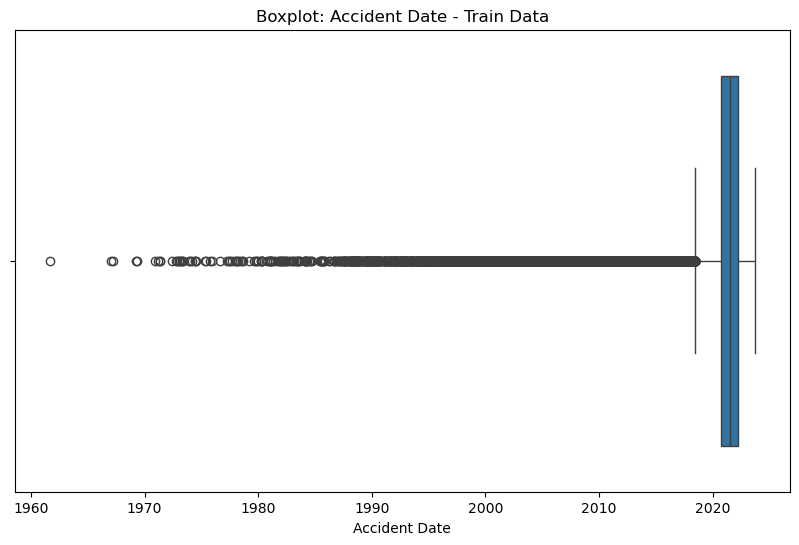

In [140]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Accident Date'])
plt.title('Boxplot: Accident Date - Train Data')
plt.xlabel('Accident Date')
plt.show()

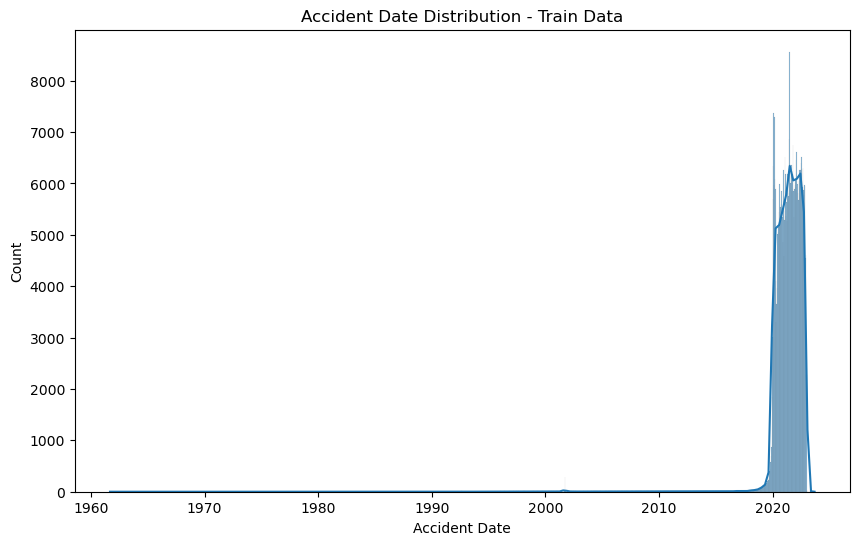

In [141]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Accident Date'], kde=True)
plt.title('Accident Date Distribution - Train Data')
plt.show()

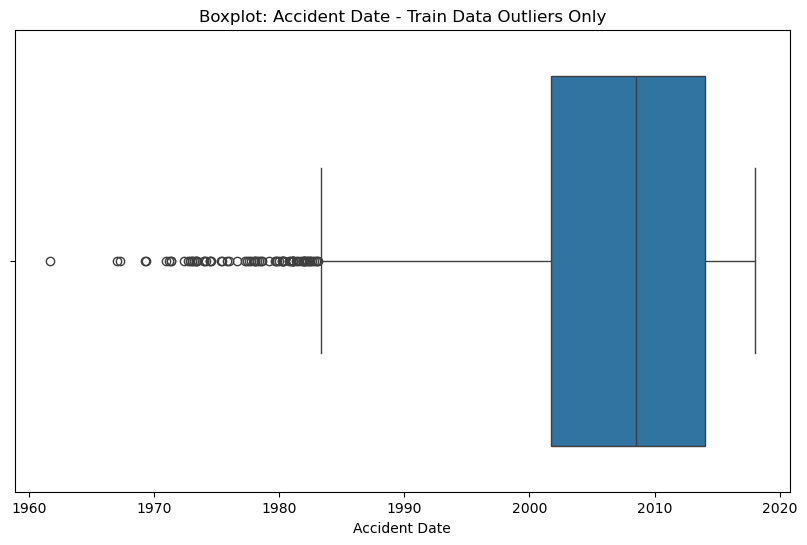

In [142]:
#examing outliers only
plt.figure(figsize=(10, 6))
sns.boxplot(x= X_train['Accident Date'][X_train['Accident Date'] <= '01-01-2018'])
plt.title('Boxplot: Accident Date - Train Data Outliers Only')
plt.xlabel('Accident Date')
plt.show()

From the plots above, we can see that outliers are spread over a large range from 1960 until 2018. The first quartile of the outliers falls around 2001. Winzoring to the year 2000 would mean moving 1/4 of the outliers to a less extreme level. Below we examine how many rows would be affected by moving our outlier threshold the year 2000 (as well as 1990 and 2010 for comparison). 

In [144]:
print(len(X_train[X_train['Accident Date'] <= '1990-01-01']))
print('Winsoring Accident Date outliers to 1990-01-01 would affect', (len(X_train[X_train['Accident Date'] <= '1990-01-01']) / len(X_train['Accident Date']) * 100),'% of rows')

192
Winsoring Accident Date outliers to 1990-01-01 would affect 0.04181002569574496 % of rows


In [145]:
print(len(X_train[X_train['Accident Date'] <= '2000-01-01']))
print('Winsoring Accident Date outliers to 2000-01-01 would affect', (len(X_train[X_train['Accident Date'] <= '2000-01-01']) / len(X_train['Accident Date']) * 100),'% of rows')



813
Winsoring Accident Date outliers to 2000-01-01 would affect 0.17703932755542007 % of rows


In [146]:
print(len(X_train[X_train['Accident Date'] <= '2010-01-01']))
print('Winsoring Accident Date outliers to 2010-01-01 would affect', (len(X_train[X_train['Accident Date'] <= '2010-01-01']) / len(X_train['Accident Date']) * 100),'% of rows')


2362
Winsoring Accident Date outliers to 2010-01-01 would affect 0.5143504202778625 % of rows


In [147]:
print(len(X_train[X_train['Accident Date'] <= '2018-01-01']))
print('Winsoring Accident Date outliers to 2018-01-01 would affect', (len(X_train[X_train['Accident Date'] <= '2018-01-01']) / len(X_train['Accident Date']) * 100),'% of rows')


4275
Winsoring Accident Date outliers to 2018-01-01 would affect 0.9309263533818214 % of rows


Accident Date outliers (dates before 2018) only constitue 1% of rows. Therefore, the amount of data affected is not an issue. We will choose to use winsorization to move extreme outliers to Jan. 1, 2000. This allows for the claims related to the 9/11 attacks to remain present in our data, as they appear in both the train and test datasets. 

In [149]:
X_train.loc[X_train['Accident Date'] < '2000-01-01', 'Accident Date'] = '2000-01-01'
X_val.loc[X_val['Accident Date'] < '2000-01-01', 'Accident Date'] = '2000-01-01'
df_test_preprocess.loc[df_test_preprocess['Accident Date'] < '2000-01-01', 'Accident Date'] = '2000-01-01'

### Re-visualizing after making outlier corrections

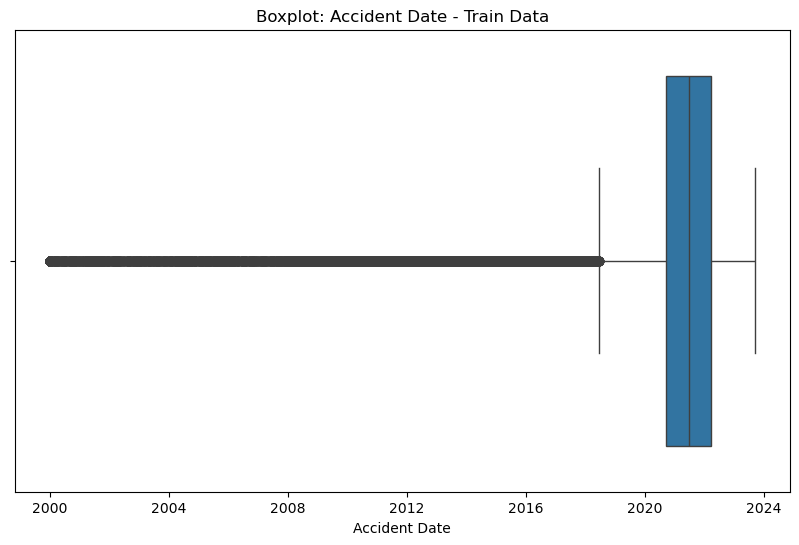

In [151]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Accident Date'])
plt.title('Boxplot: Accident Date - Train Data')
plt.xlabel('Accident Date')
plt.show()

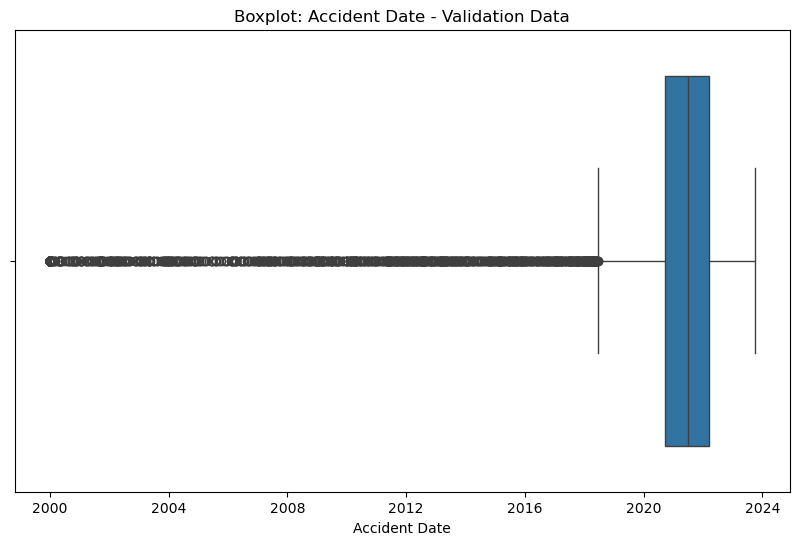

In [152]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_val['Accident Date'])
plt.title('Boxplot: Accident Date - Validation Data')
plt.xlabel('Accident Date')
plt.show()

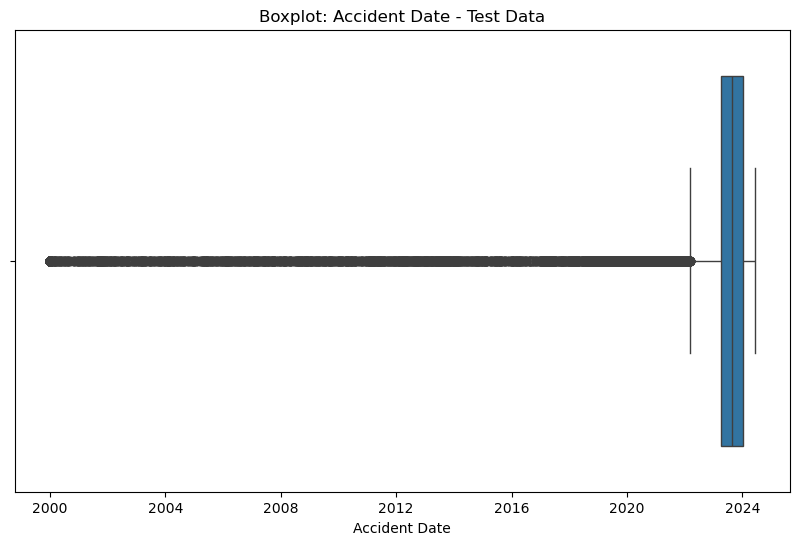

In [153]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_preprocess['Accident Date'])
plt.title('Boxplot: Accident Date - Test Data')
plt.xlabel('Accident Date')
plt.show()

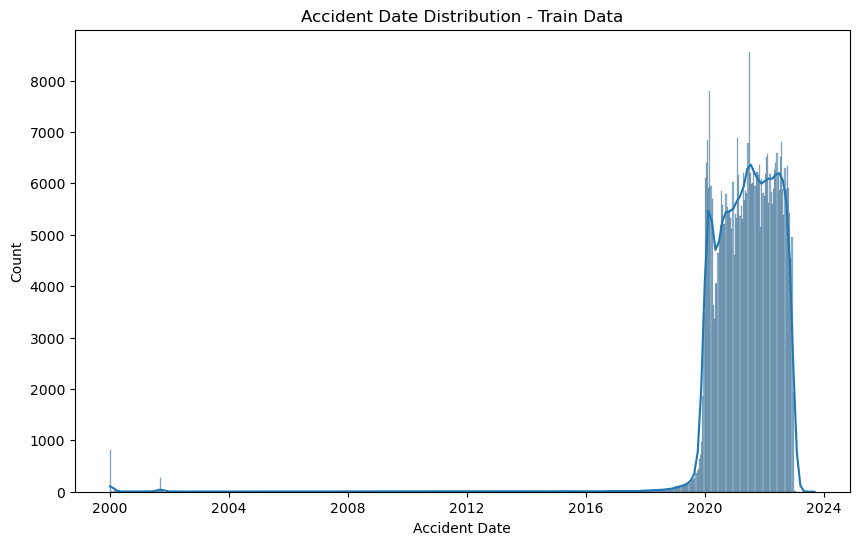

In [154]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Accident Date'], kde=True)
plt.title('Accident Date Distribution - Train Data')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="age_outl">
    
## 2.4.2.2 Age at Injury
 
</a>

Recalling the plots from the EDA, Age at Injury has some extreme high outliers. Not only are these values very high relative to the rest of the data, but they also do not make sense in context. The retirement age in the US is 65; a 100 year old person is highly unlikely to still be working, and thus it would be highly unlikely for them to get injured on the job. Below we examine how many rows would be affected by various thresholds.

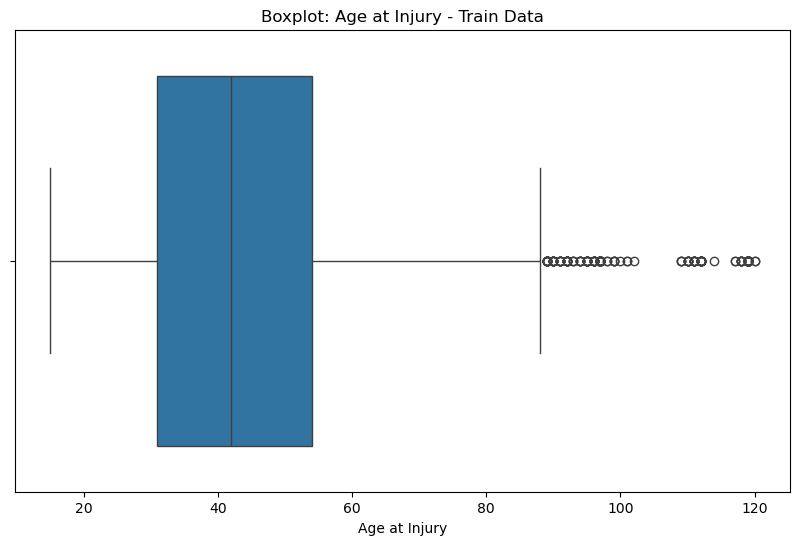

In [157]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Age at Injury'])
plt.title('Boxplot: Age at Injury - Train Data')
plt.xlabel('Age at Injury')
plt.show()

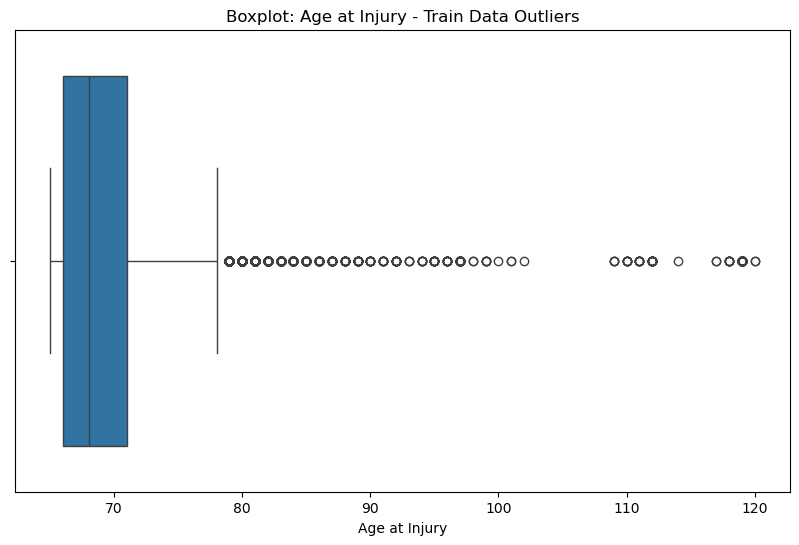

In [158]:
#examing only ages above retirement age
plt.figure(figsize=(10, 6))
sns.boxplot(x= X_train['Age at Injury'][X_train['Age at Injury'] >= 65])
plt.title('Boxplot: Age at Injury - Train Data Outliers')
plt.xlabel('Age at Injury')
plt.show()

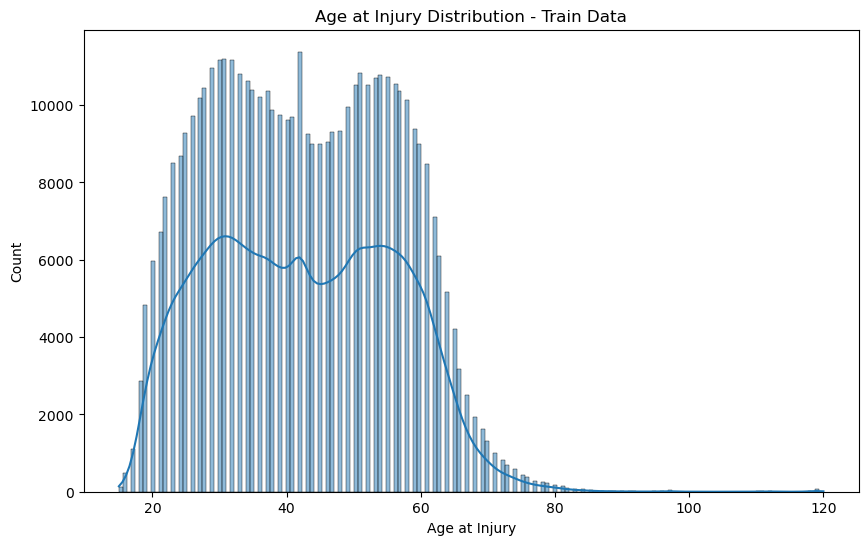

In [159]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Age at Injury'], kde=True)
plt.title('Age at Injury Distribution - Train Data')
plt.show()

In [160]:
print(len(X_train[X_train['Age at Injury'] >= 70]))
print('Winsoring Age at Injury outliers to 70 would affect', (len(X_train[X_train['Age at Injury'] >= 70]) / len(X_train['Age at Injury']) * 100),'% of rows')


6914
Winsoring Age at Injury outliers to 70 would affect 1.505596446147816 % of rows


In [161]:
print(len(X_train[X_train['Age at Injury'] >= 75]))
print('Winsoring Age at Injury outliers to 75 would affect', (len(X_train[X_train['Age at Injury'] >= 75]) / len(X_train['Age at Injury']) * 100),'% of rows')


2481
Winsoring Age at Injury outliers to 75 would affect 0.5402639257872044 % of rows


In [162]:
print(len(X_train[X_train['Age at Injury'] >= 80]))
print('Winsoring Age at Injury outliers to 80 would affect', (len(X_train[X_train['Age at Injury'] >= 80]) / len(X_train['Age at Injury']) * 100),'% of rows')


911
Winsoring Age at Injury outliers to 80 would affect 0.19837986150428988 % of rows


In [163]:
# From our EDA, we know outliers (according to 1.5 * IQR) begin at 88.5 years of age.
print(len(X_train[X_train['Age at Injury'] >= 88.55]))
print('Winsoring Age at Injury outliers to 88.5 would affect', (len(X_train[X_train['Age at Injury'] >= 88.5]) / len(X_train['Age at Injury']) * 100),'% of rows')


235
Winsoring Age at Injury outliers to 88.5 would affect 0.051173729367187844 % of rows


We will move the threshold to 80 years at injury, as this represents the oldest likely age to still be working. This threshold does not affect a high number of rows, but eliminates all outliers and makes our data more realistic.

In [165]:
X_train.loc[X_train['Age at Injury'] > 80, 'Age at Injury'] = 80
X_val.loc[X_val['Age at Injury'] > 80, 'Age at Injury'] = 80
df_test_preprocess.loc[df_test_preprocess['Age at Injury'] > 80, 'Age at Injury'] = 80

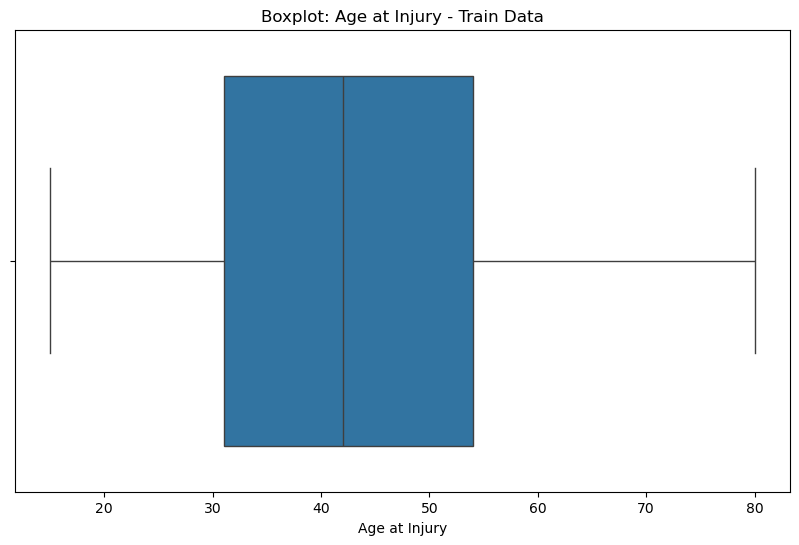

In [166]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Age at Injury'])
plt.title('Boxplot: Age at Injury - Train Data')
plt.xlabel('Age at Injury')
plt.show()

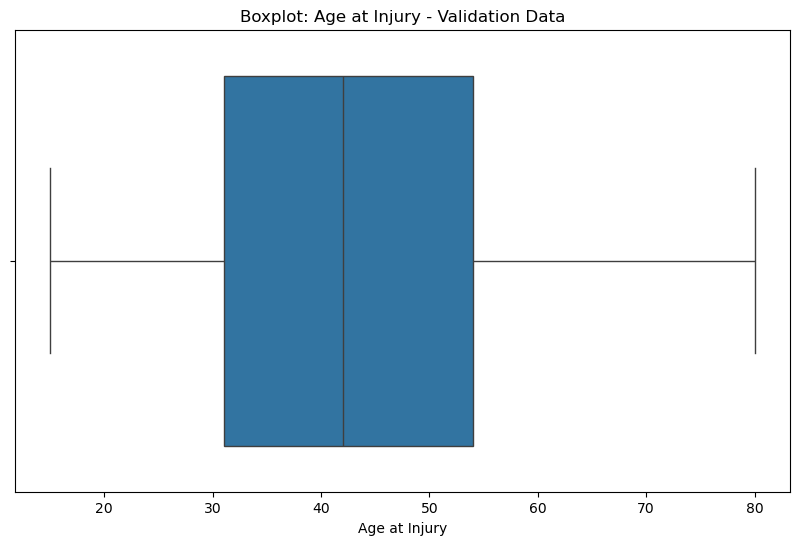

In [167]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_val['Age at Injury'])
plt.title('Boxplot: Age at Injury - Validation Data')
plt.xlabel('Age at Injury')
plt.show()

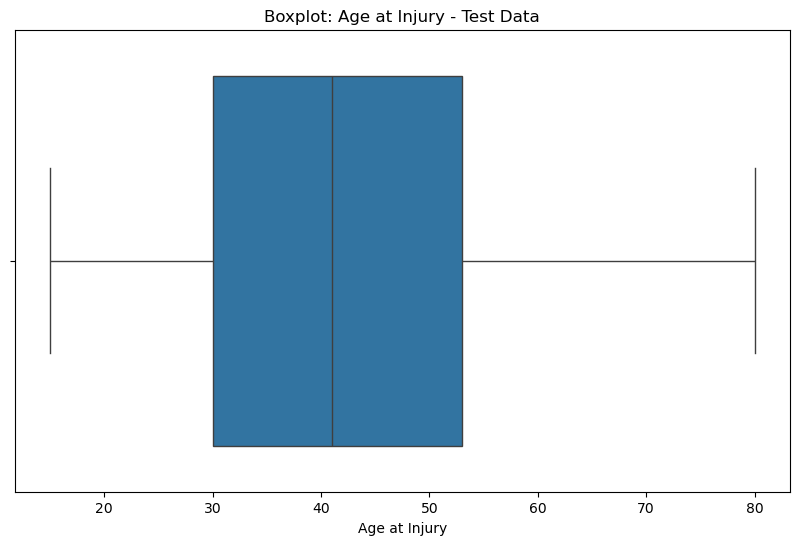

In [168]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_preprocess['Age at Injury'])
plt.title('Boxplot: Age at Injury - Test Data')
plt.xlabel('Age at Injury')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="aww_outl">
    
## 2.4.2.3 Average Weekly Wage
 
</a>

Recalling from our EDA, there are a number of extreme high outliers in Average Weekly Wage. We will recusrively remove extreme high outliers until a visual threshold becomes more obvious to complete winsorization.


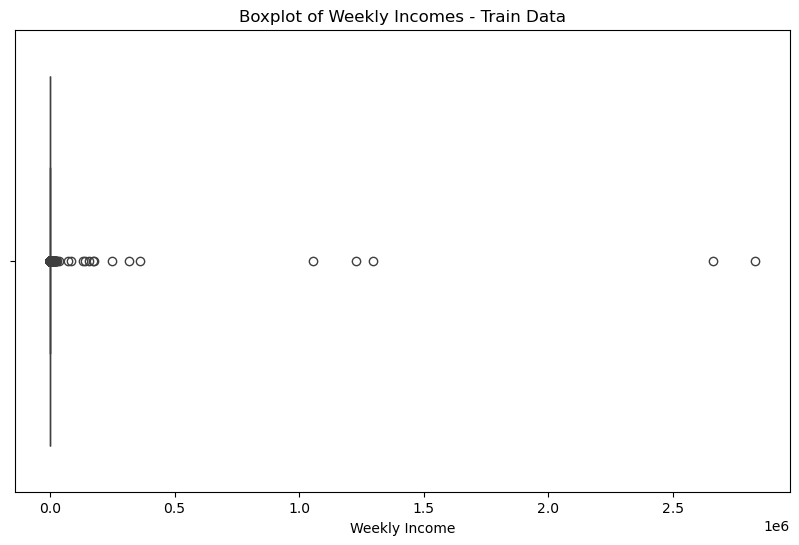

In [171]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()


Based on the plot above and the visualizations in our EDA, we see there are some extreme high outliers present. We will start by using winsorization to move the wage values about 250,000 down to 250,000, then revisualize.

In [173]:
X_train.loc[X_train['Average Weekly Wage'] >= 250000]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5580574,2020-10-10,30.0,0,2020-10-16,0,2659398.0,1990.0,2020-10-15,0,LM INSURANCE CORP,...,TRANSPORTATION AND WAREHOUSING,1,29.0,ON SAME LEVEL,28.0,FRACTURE,35.0,HAND,3.0,1
5816228,2021-06-28,52.0,0,2021-09-22,1,2828079.0,1968.0,2021-10-22,1,LIBERTY INSURANCE CORP.,...,CONSTRUCTION,4,52.0,CONTINUAL NOISE,72.0,LOSS OF HEARING,13.0,EAR(S),3.0,1
6058736,2022-07-26,62.0,0,2022-08-11,1,315528.0,1960.0,2022-08-11,0,AMTRUST INS CO OF KANSAS INC,...,REAL ESTATE AND RENTAL AND LEASING,4,27.0,FROM LIQUID OR GREASE SPILLS,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",53.0,KNEE,4.0,1
5402075,2020-01-03,25.0,0,2020-01-13,1,360000.0,1994.0,2020-01-10,1,FEDERAL INSURANCE COMPANY,...,"ARTS, ENTERTAINMENT, AND RECREATION",2,75.0,FALLING OR FLYING OBJECT,28.0,FRACTURE,47.0,SPINAL CORD,0.0,1
5836263,2021-10-11,39.0,0,2021-10-18,0,1227017.0,1981.0,2021-10-18,0,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,4,53.0,TWISTING,52.0,STRAIN OR TEAR,34.0,WRIST,3.0,1
5932389,2022-02-22,29.0,0,2022-02-28,0,1297304.0,1992.0,2022-02-28,0,A I U INSURANCE COMPANY,...,INFORMATION,2,76.0,HAND TOOL OR MACHINE IN USE,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",36.0,FINGER(S),2.0,1
5531203,2020-07-20,22.0,0,2020-08-05,0,1055027.0,1997.0,2020-08-04,0,LM INSURANCE CORP,...,HEALTH CARE AND SOCIAL ASSISTANCE,1,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,1.0,1


In [174]:
X_train.loc[X_train['Average Weekly Wage'] >= 250000, 'Average Weekly Wage'] = 250000

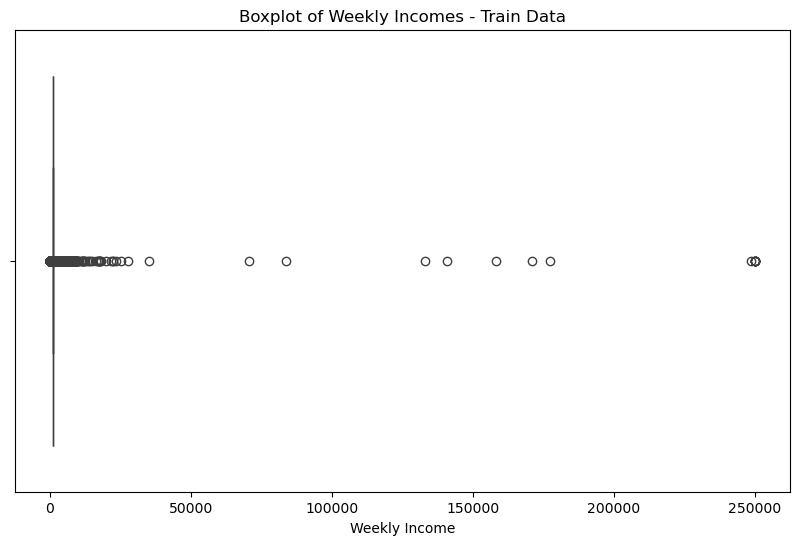

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()


Our next visual threshold will be 50,000, as the outliers appear to become more sparse above this value.

In [177]:
X_train.loc[X_train['Average Weekly Wage'] >= 50000, 'Average Weekly Wage'] = 50000

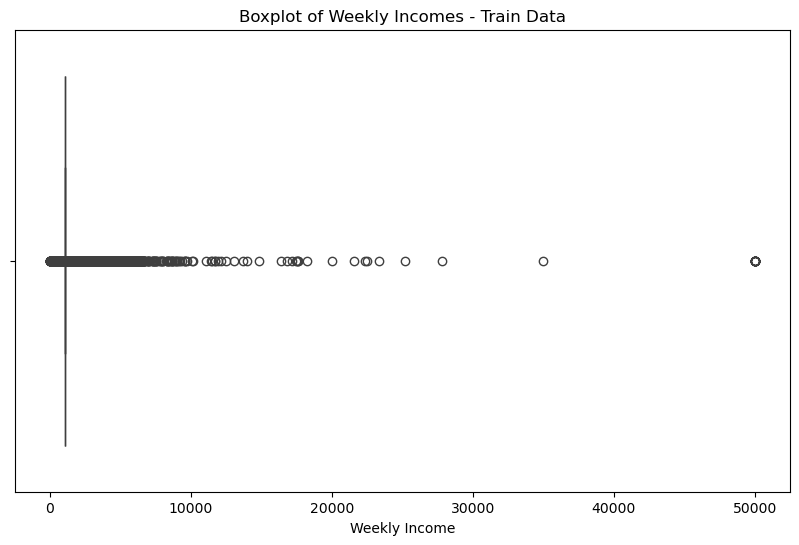

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()


In [179]:
X_train.loc[X_train['Average Weekly Wage'] >= 10000, 'Average Weekly Wage'] = 10000

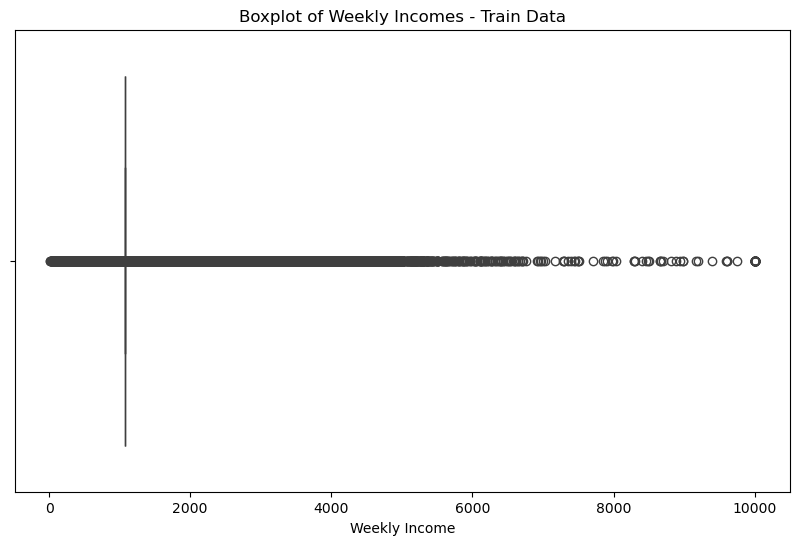

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()


As we recursively eliminate high outliers, we can see they become less dense near a value of $7,000 per week. We will use this as our final threshold and move all high outliers to a value of 7,000.

In [182]:
X_train.loc[X_train['Average Weekly Wage'] >= 7000, 'Average Weekly Wage'] = 7000
X_val.loc[X_val['Average Weekly Wage'] >= 7000, 'Average Weekly Wage'] = 7000
df_test_preprocess.loc[df_test_preprocess['Average Weekly Wage'] >= 7000, 'Average Weekly Wage'] = 7000

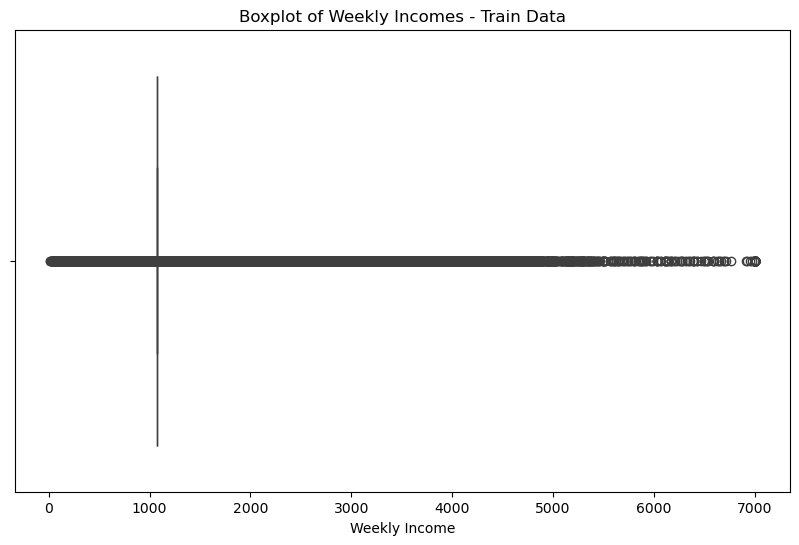

In [183]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Train Data')
plt.xlabel('Weekly Income')
plt.show()


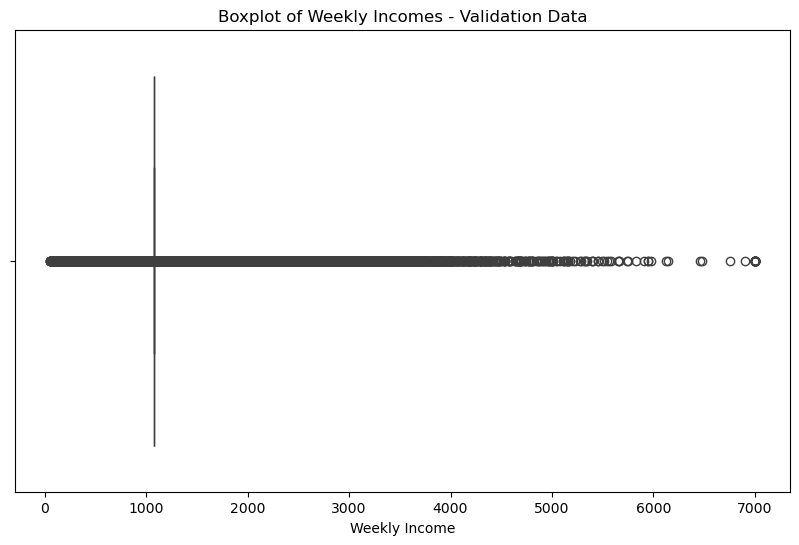

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_val['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Validation Data')
plt.xlabel('Weekly Income')
plt.show()

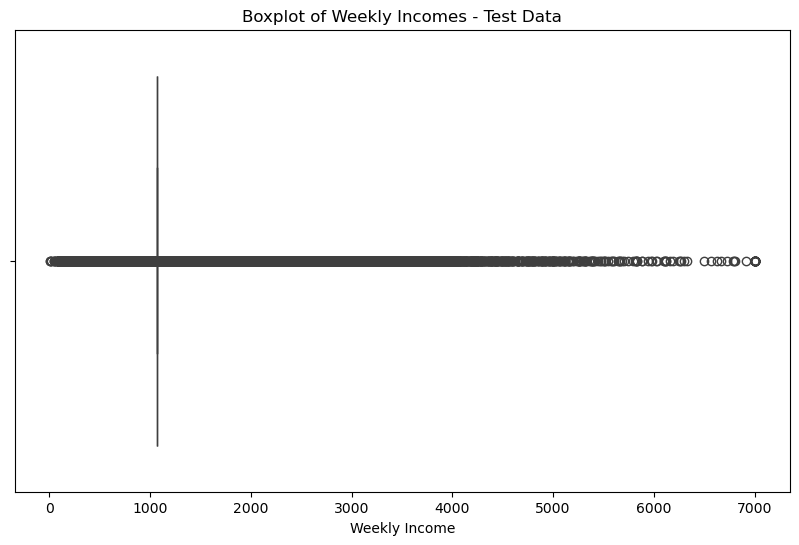

In [185]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_preprocess['Average Weekly Wage'])
plt.title('Boxplot of Weekly Incomes - Test Data')
plt.xlabel('Weekly Income')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="by_outl">
    
## 2.4.2.4 Birth Year
 
</a>

Re-examining plots from our EDA, we see Birth Year presents a similar situation as Age at Injury. We have many extreme low outliers, as low as 1900, as well as a few high values (around 2020). As most of our injury data is centered around 2020, these dates are unusual.  

We will first focus on the high values. As the legal US working age is 14 in the US, any claimant with an birth year less than 14 years before their accident date is an incorrect value. We will create a feature for the sake of examining this relationship below.

In [188]:
X_train['Imputed Age at Injury'] = X_train['Accident Date'].dt.year - X_train['Birth Year']
X_val['Imputed Age at Injury'] = X_val['Accident Date'].dt.year - X_val['Birth Year']

In [189]:
X_train['Birth Year'].describe()

count    459220.000000
mean       1977.819172
std          13.837537
min        1900.000000
25%        1967.000000
50%        1978.000000
75%        1989.000000
max        2018.000000
Name: Birth Year, dtype: float64

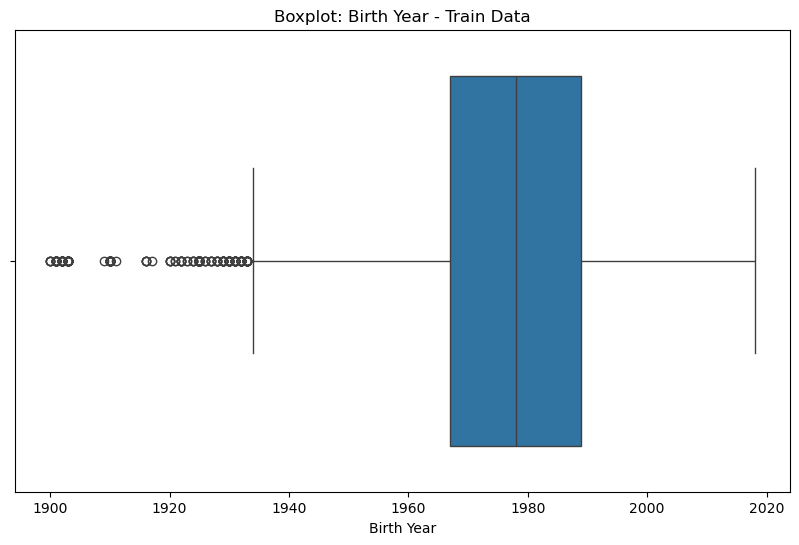

In [190]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Birth Year'])
plt.title('Boxplot: Birth Year - Train Data')
plt.xlabel('Birth Year')
plt.show()

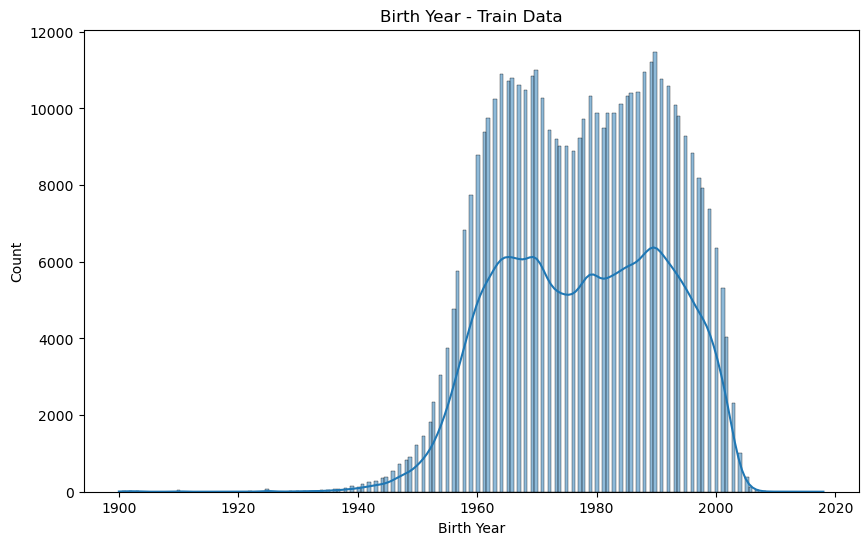

In [191]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Birth Year'], kde=True)
plt.title('Birth Year - Train Data')
plt.show()

In [192]:
X_train.loc[X_train['Imputed Age at Injury'] <= 14]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage,Imputed Age at Injury
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5412861,2020-01-17,42.0,0,2020-01-27,0,1070.12,2009.0,2020-01-27 00:00:00.000000000,0,TECHNOLOGY INSURANCE CO. INC.,...,3,70.0,"STRIKING AGAINST OR STEPPING ON, NOC",10.0,CONTUSION,15.0,NOSE,6.0,0,11.0
5747487,2021-05-22,42.0,0,2021-06-18,0,1070.12,2008.0,2021-06-18 00:00:00.000000000,0,"FREEPORT, VILLAGE OF",...,4,59.0,USING TOOL OR MACHINERY,40.0,LACERATION,36.0,FINGER(S),0.0,1,13.0
5821685,2021-09-18,42.0,0,2021-09-28,0,1070.12,2014.0,2021-09-27 00:00:00.000000000,1,INDEMNITY INSURANCE CO OF,...,0,87.0,FOREIGN MATTER (BODY) IN EYE(S),37.0,INFLAMMATION,14.0,EYE(S),4.0,0,7.0
5912157,2022-02-01,42.0,0,2022-02-02,0,1070.12,2008.0,2022-02-02 00:00:00.000000000,0,STATE INSURANCE FUND,...,4,29.0,ON SAME LEVEL,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),2.0,0,14.0
5888830,2021-10-29,42.0,0,2022-01-03,0,1070.12,2011.0,2022-01-04 00:00:00.000000000,1,EMPLOYERS ASSURANCE COMPANY,...,2,27.0,FROM LIQUID OR GREASE SPILLS,37.0,INFLAMMATION,32.0,ELBOW,2.0,0,10.0
6022076,2022-05-25,42.0,0,2022-06-23,0,1070.12,2010.0,2022-06-23 00:00:00.000000000,0,A I U INSURANCE COMPANY,...,4,99.0,"OTHER - MISCELLANEOUS, NOC",37.0,INFLAMMATION,60.0,LUNGS,5.0,0,12.0
6072694,2022-08-25,42.0,0,2022-08-29,0,1070.12,2008.0,2022-08-29 00:00:00.000000000,0,SARATOGA COUNTY WC PLAN,...,1,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,36.0,FINGER(S),6.0,0,14.0
5597186,2020-10-23,42.0,0,2020-11-12,1,150.00,2006.0,2020-11-17 00:00:00.000000000,1,STATE INSURANCE FUND,...,1,31.0,"FALL, SLIP OR TRIP, NOC",49.0,SPRAIN OR TEAR,56.0,FOOT,5.0,1,14.0
5864892,2021-11-17,42.0,0,2021-11-24,0,1070.12,2007.0,2021-11-23 00:00:00.000000000,0,BANKERS STANDARD INS. CO.,...,4,80.0,OBJECT HANDLED BY OTHERS,10.0,CONTUSION,18.0,SOFT TISSUE,5.0,0,14.0


We see the above 39 rows correspond with claimants whose Birth Year and Accident Date have a difference of less than 14 years. As most of the rows have an Age at Injury filled by the median, it is impossible to correctly impute the appropriate Birth Year. As the number of rows is quite small, we will drop these from our dataset.

In [194]:
X_train.drop(X_train[X_train['Imputed Age at Injury'] <= 14].index, inplace = True)
X_val.drop(X_val[X_val['Imputed Age at Injury'] <= 14].index, inplace = True)

In [195]:
#checking to make sure they are gone
X_train.loc[X_train['Imputed Age at Injury'] <= 14]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage,Imputed Age at Injury
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


Now we will turn our focus to the negative outliers. Based on the boxplot plot above, any birth year before roughy 1935 is considered an outlier. Similar to the high values of Age at Injury, we have a group of outliers that have extremely low birth years. We imagine the two groups of outliers to be the same, but we will examine the rows affected at different thresholds nonetheless.

In [197]:
print(len(X_train[X_train['Birth Year'] <= 1940]))
print('Winsoring Birth Year outliers to 1940 would affect', (len(X_train[X_train['Birth Year'] <= 1940]) / len(X_train['Birth Year']) * 100),'% of rows')


893
Winsoring Birth Year outliers to 1940 would affect 0.19447668784204922 % of rows


In [198]:
print(len(X_train[X_train['Birth Year'] <= 1935]))
print('Winsoring Birth Year outliers to 1935 would affect', (len(X_train[X_train['Birth Year'] <= 1935]) / len(X_train['Birth Year']) * 100),'% of rows')


383
Winsoring Birth Year outliers to 1935 would affect 0.08340937451680273 % of rows


In [199]:
print(len(X_train[X_train['Birth Year'] <= 1930]))
print('Winsoring Birth Year outliers to 1930 would affect', (len(X_train[X_train['Birth Year'] <= 1930]) / len(X_train['Birth Year']) * 100),'% of rows')


252
Winsoring Birth Year outliers to 1930 would affect 0.0548803195254159 % of rows


In [200]:
print(len(X_train[X_train['Birth Year'] <= 1920]))
print('Winsoring Birth Year outliers to 1920 would affect', (len(X_train[X_train['Birth Year'] <= 1920]) / len(X_train['Birth Year']) * 100),'% of rows')


123
Winsoring Birth Year outliers to 1920 would affect 0.026786822625500622 % of rows


Visually, it seems as though 1935 is the best threshold for winsorization of outliers. 383 rows are affected at this threshold level, which is a reasonable amount given the size of our dataframe. We will move all birth years below 1935 and set them to 1935.

In [202]:
X_train.loc[X_train['Birth Year'] < 1935, 'Birth Year'] = 1935
X_val.loc[X_val['Birth Year'] < 1935, 'Birth Year'] = 1935
df_test_preprocess.loc[df_test_preprocess['Birth Year'] < 1935, 'Birth Year'] = 1935

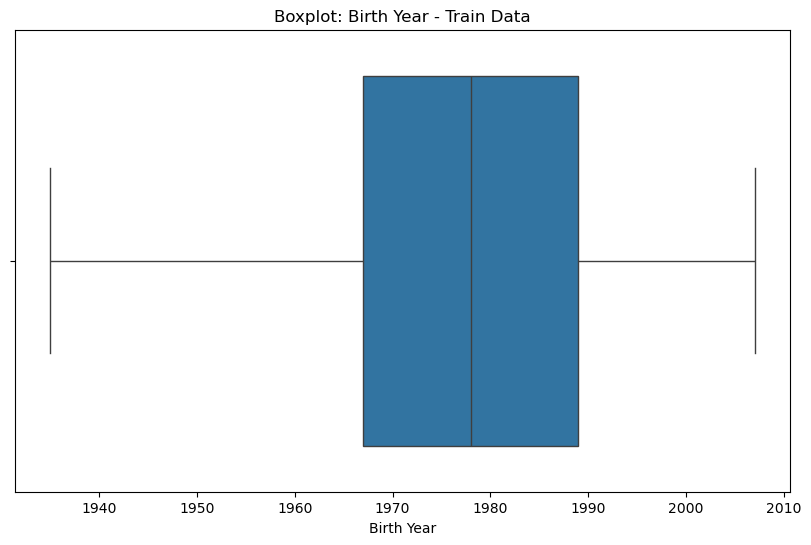

In [203]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['Birth Year'])
plt.title('Boxplot: Birth Year - Train Data')
plt.xlabel('Birth Year')
plt.show()

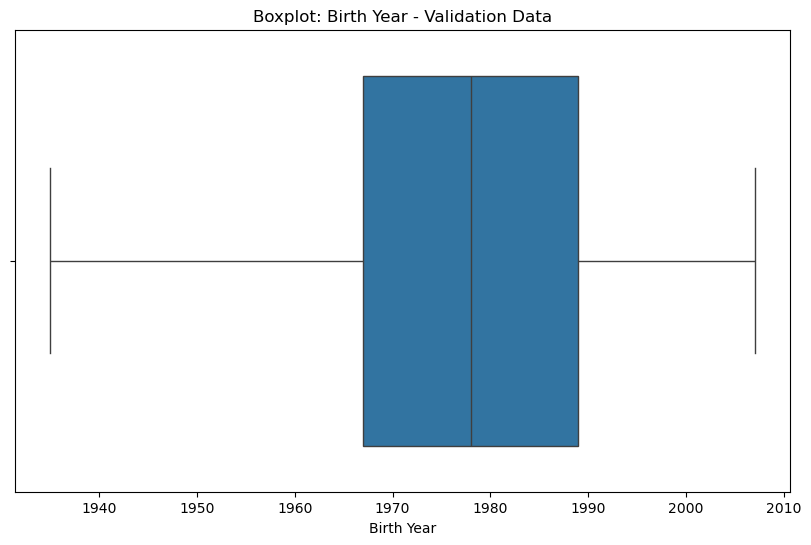

In [204]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_val['Birth Year'])
plt.title('Boxplot: Birth Year - Validation Data')
plt.xlabel('Birth Year')
plt.show()

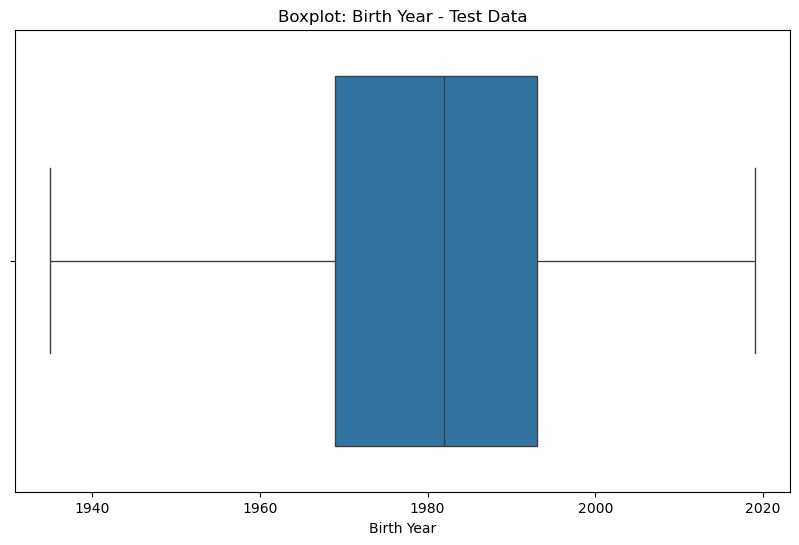

In [205]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_preprocess['Birth Year'])
plt.title('Boxplot: Birth Year - Test Data')
plt.xlabel('Birth Year')
plt.show()

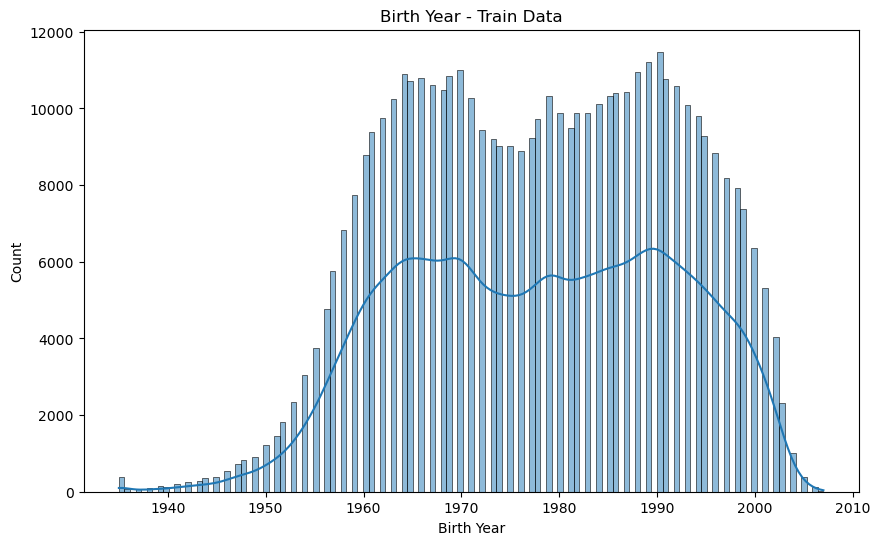

In [206]:
# Birth Year distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Birth Year'], kde=True)
plt.title('Birth Year - Train Data')
plt.show()

We see now that our data for Birth Year has no outliers and is more normally distributed.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="c2_outl">
    
## 2.4.2.4 C-2 Date
 
</a>

We recall from the visualizations in the EDA that C-2 Date has many low outliers. Here we will examine if they are outliers or strange values, and then deal with them appropriately.

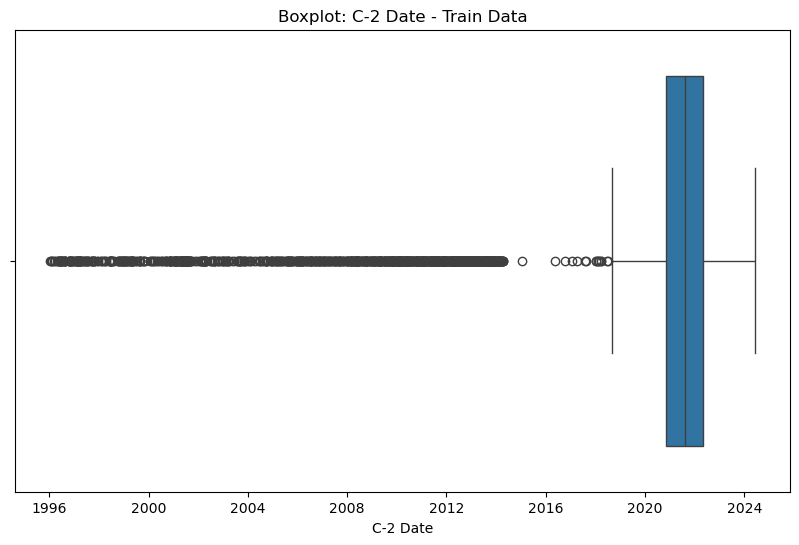

In [210]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['C-2 Date'])
plt.title('Boxplot: C-2 Date - Train Data')
plt.xlabel('C-2 Date')
plt.show()

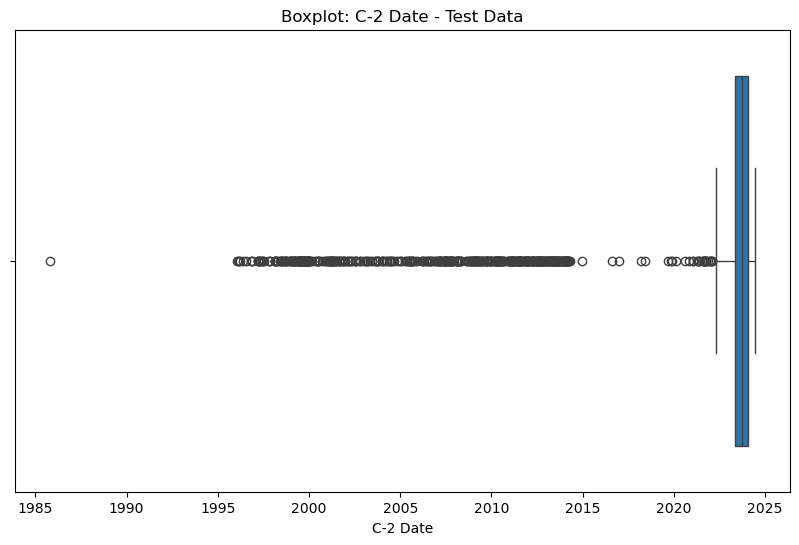

In [211]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_preprocess['C-2 Date'])
plt.title('Boxplot: C-2 Date - Test Data')
plt.xlabel('C-2 Date')
plt.show()

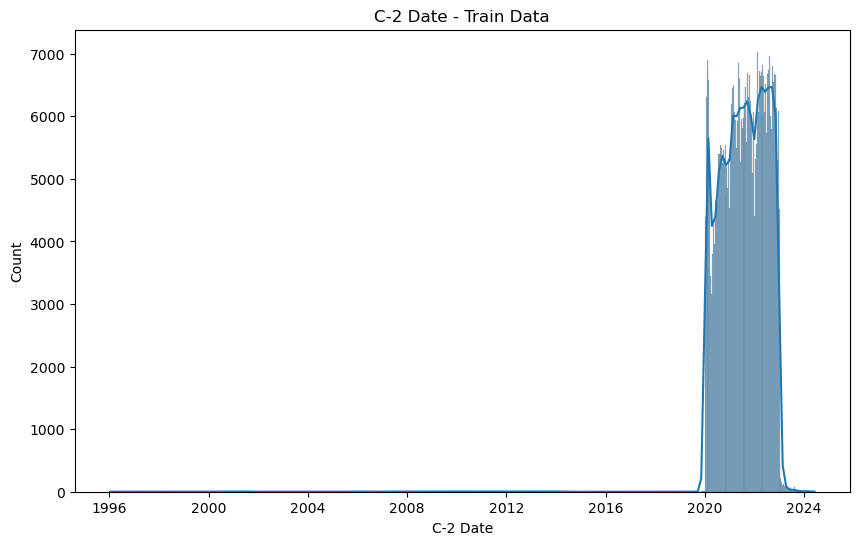

In [212]:
# C-2 Date distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train['C-2 Date'], kde=True)
plt.title('C-2 Date - Train Data')
plt.show()

From the visuals above and in our EDA on the training data, we see a gap between outliers after and before 2016. We will check the rows associated with C-2 dates before 2016, and then adjust their values to be equal to 2016.

In [214]:
print(len(X_train[X_train['C-2 Date'] <= '01-01-2016']))
print('Winsoring C-2 Date outliers to 01-01-2016 would affect', (len(X_train[X_train['C-2 Date'] <= '01-01-2016']) / len(X_train['Birth Year']) * 100),'% of rows')

971
Winsoring C-2 Date outliers to 01-01-2016 would affect 0.21146345340943987 % of rows


In [215]:
X_train.loc[X_train['C-2 Date'] < '2016-01-01', 'C-2 Date'] = '2016-01-01'
X_val.loc[X_val['C-2 Date'] < '2016-01-01', 'C-2 Date'] = '2016-01-01'
df_test_preprocess.loc[df_test_preprocess['C-2 Date'] < '2016-01-01', 'C-2 Date'] = '2016-01-01'

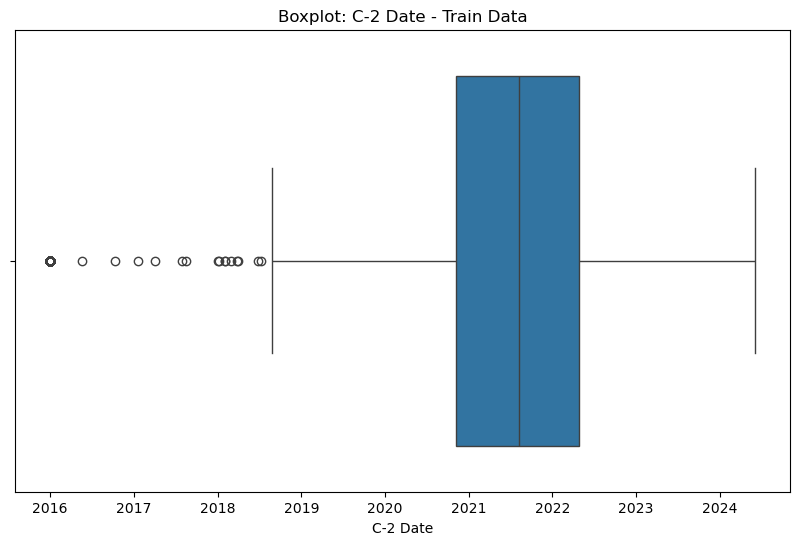

In [216]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['C-2 Date'])
plt.title('Boxplot: C-2 Date - Train Data')
plt.xlabel('C-2 Date')
plt.show()

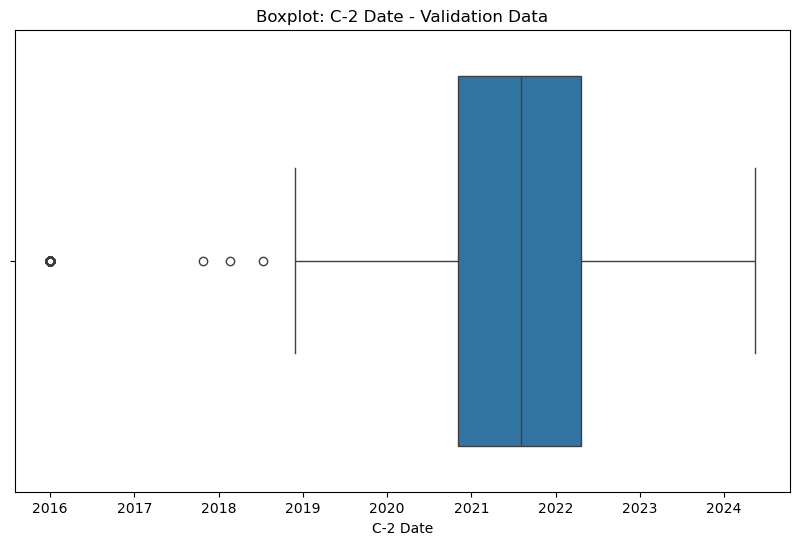

In [217]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_val['C-2 Date'])
plt.title('Boxplot: C-2 Date - Validation Data')
plt.xlabel('C-2 Date')
plt.show()

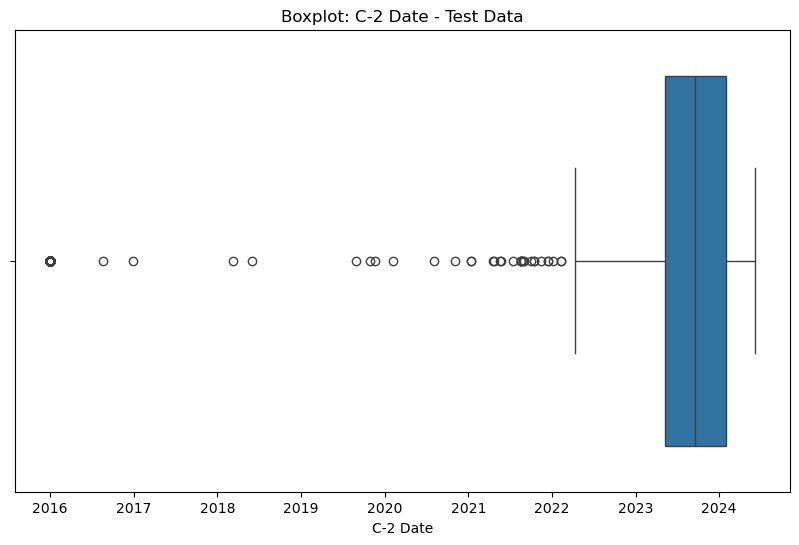

In [218]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_test_preprocess['C-2 Date'])
plt.title('Boxplot: C-2 Date - Test Data')
plt.xlabel('C-2 Date')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="ime4_outl">
    
## 2.4.2.5 IME-4 Count
 
</a>

Based on the plots in our EDA and the one below, there appears to be a visual threshold for extreme high outliers around 35. We will adjust extreme high outliers to match that point.

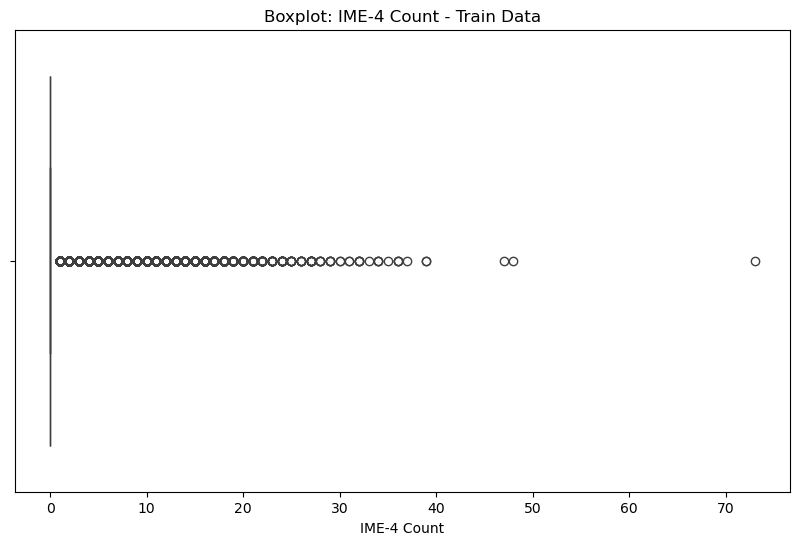

In [221]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['IME-4 Count'])
plt.title('Boxplot: IME-4 Count - Train Data')
plt.xlabel('IME-4 Count')
plt.show()

In [222]:
X_train.loc[X_train['IME-4 Count'] > 35, 'IME-4 Count'] = 35
X_val.loc[X_val['IME-4 Count'] > 35, 'IME-4 Count'] = 35
df_test_preprocess.loc[df_test_preprocess['IME-4 Count'] > 35, 'IME-4 Count'] = 35

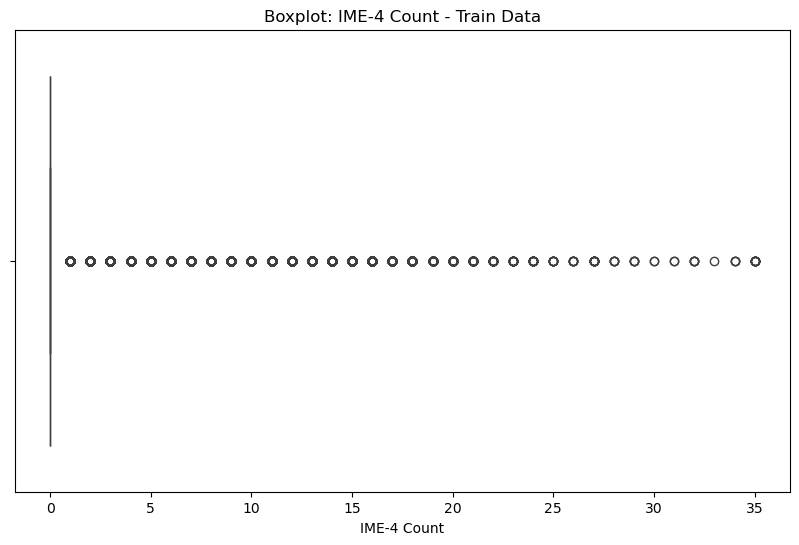

In [223]:
# Boxplot to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['IME-4 Count'])
plt.title('Boxplot: IME-4 Count - Train Data')
plt.xlabel('IME-4 Count')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="mv_outl">
    
# 2.5. Multivariate Analysis after Preprocessing
 
</a>

In [225]:
#selecting only numerical features
numerical_feats = X_train[['Accident Date',
                    'Age at Injury',
                    'Assembly Date',
                    'Attorney/Representative',
                    'Average Weekly Wage',
                    'Birth Year',
                    'C-2 Date',
                    'C-3 Date',
                    'COVID-19 Indicator',
                    'First Hearing Date',
                    'IME-4 Count',
                    'Number of Dependents',]]

#from test as well
numerical_feats_test = df_test_preprocess[['Accident Date',
                    'Age at Injury',
                    'Assembly Date',
                    'Attorney/Representative',
                    'Average Weekly Wage',
                    'Birth Year',
                    'C-2 Date',
                    'C-3 Date',
                    'COVID-19 Indicator',
                    'First Hearing Date',
                    'IME-4 Count',
                    'Number of Dependents',]]

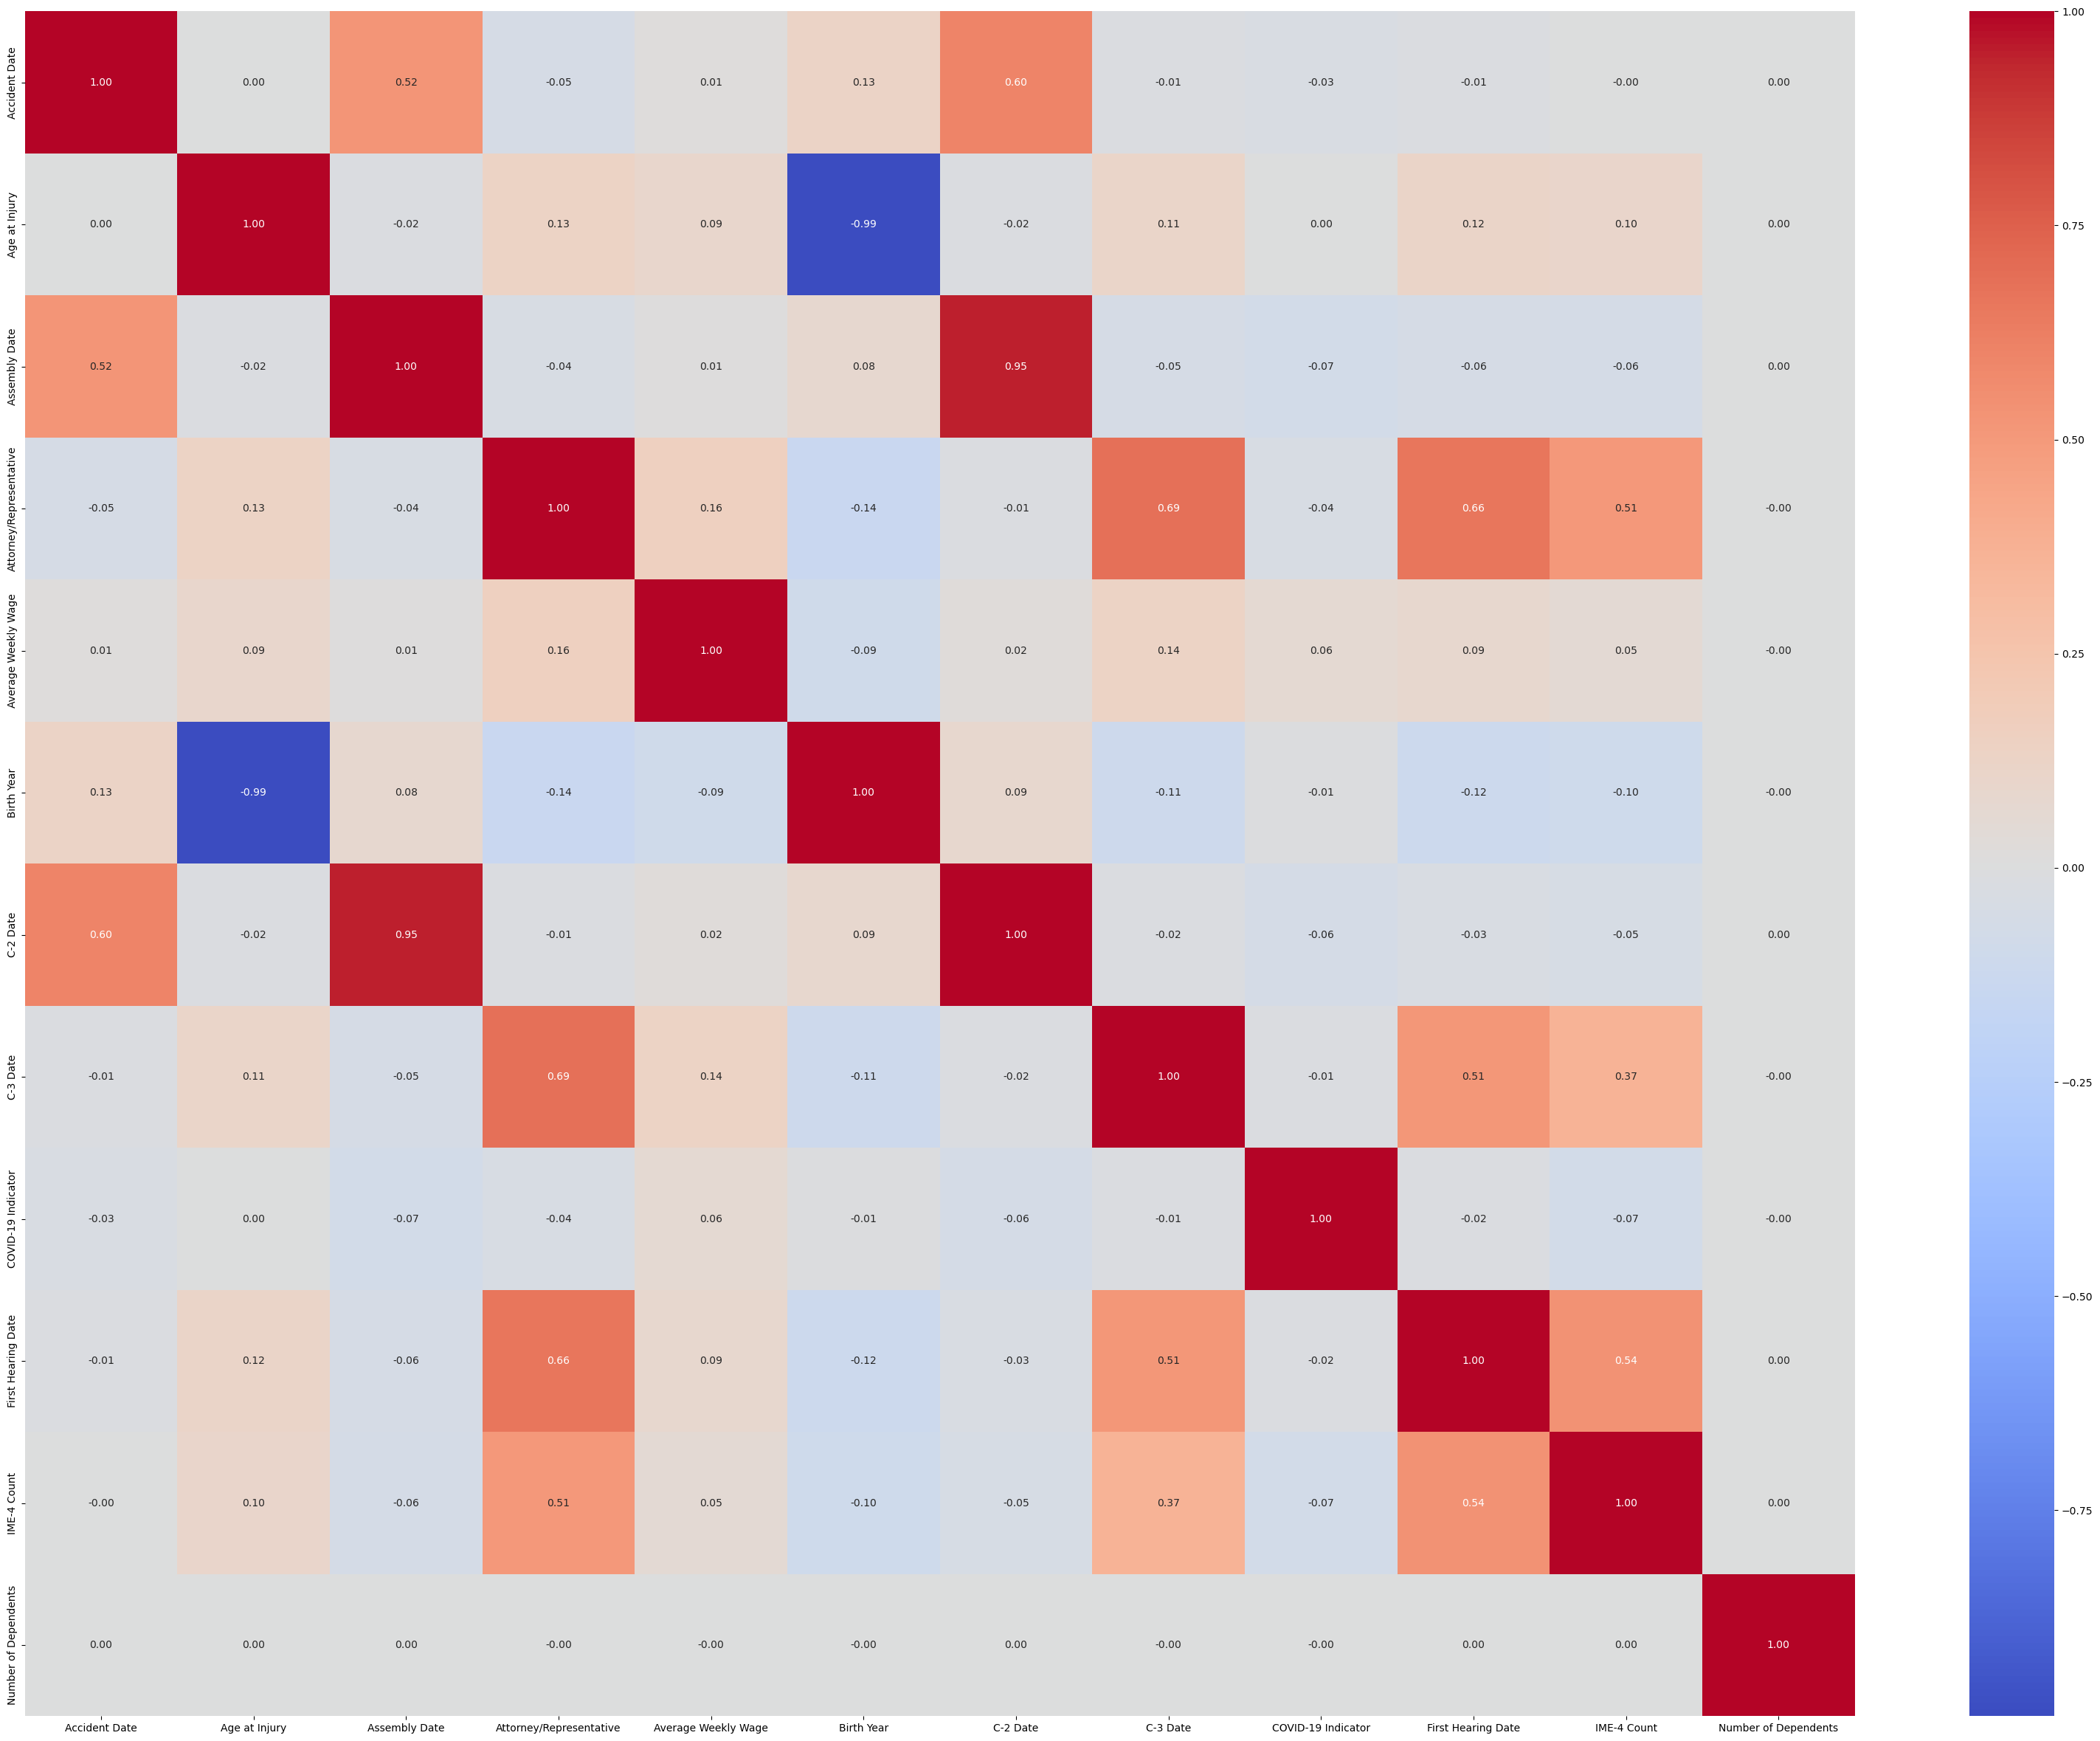

In [226]:
correlation = numerical_feats
correlation = correlation.dropna()

correlation = correlation.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

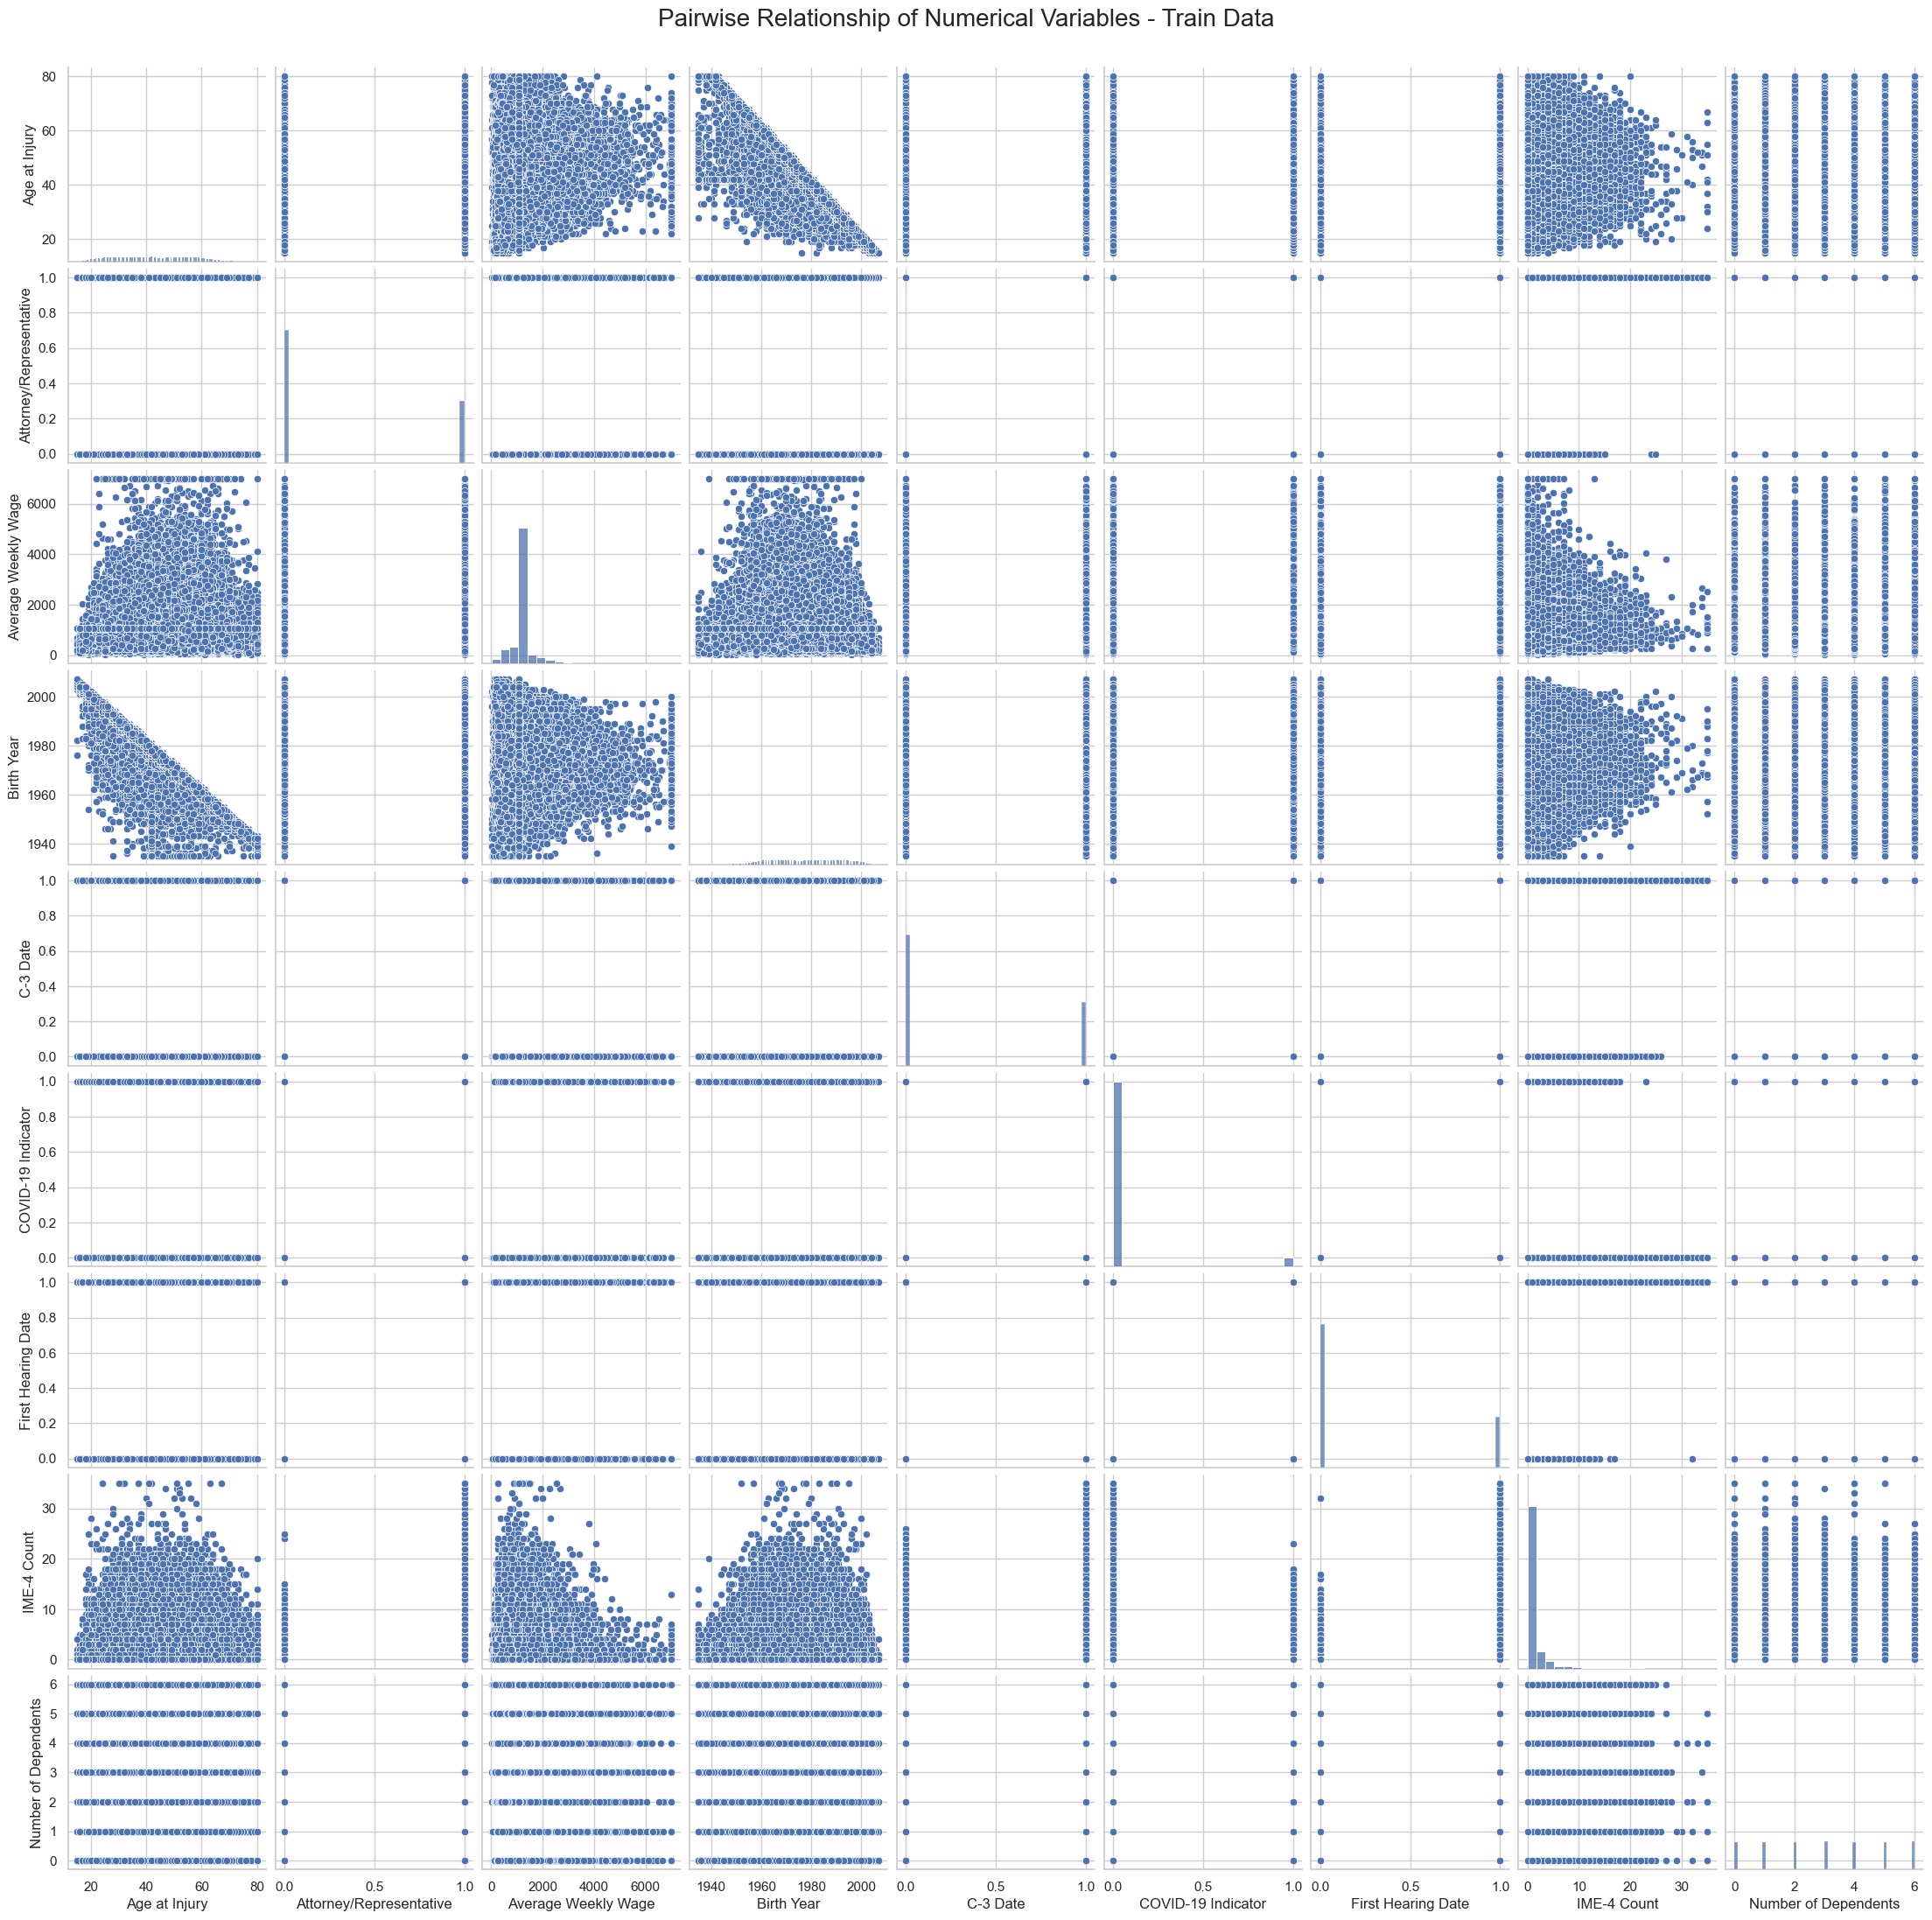

In [227]:
custom_palette = sns.color_palette("viridis", as_cmap=True)(np.linspace(0, 0.3, 100))

sns.set(style="whitegrid")
pairplot = sns.pairplot(numerical_feats, diag_kind="hist",
                        palette=custom_palette, plot_kws={'cmap': 'viridis'})
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables - Train Data", fontsize=20)

plt.show()

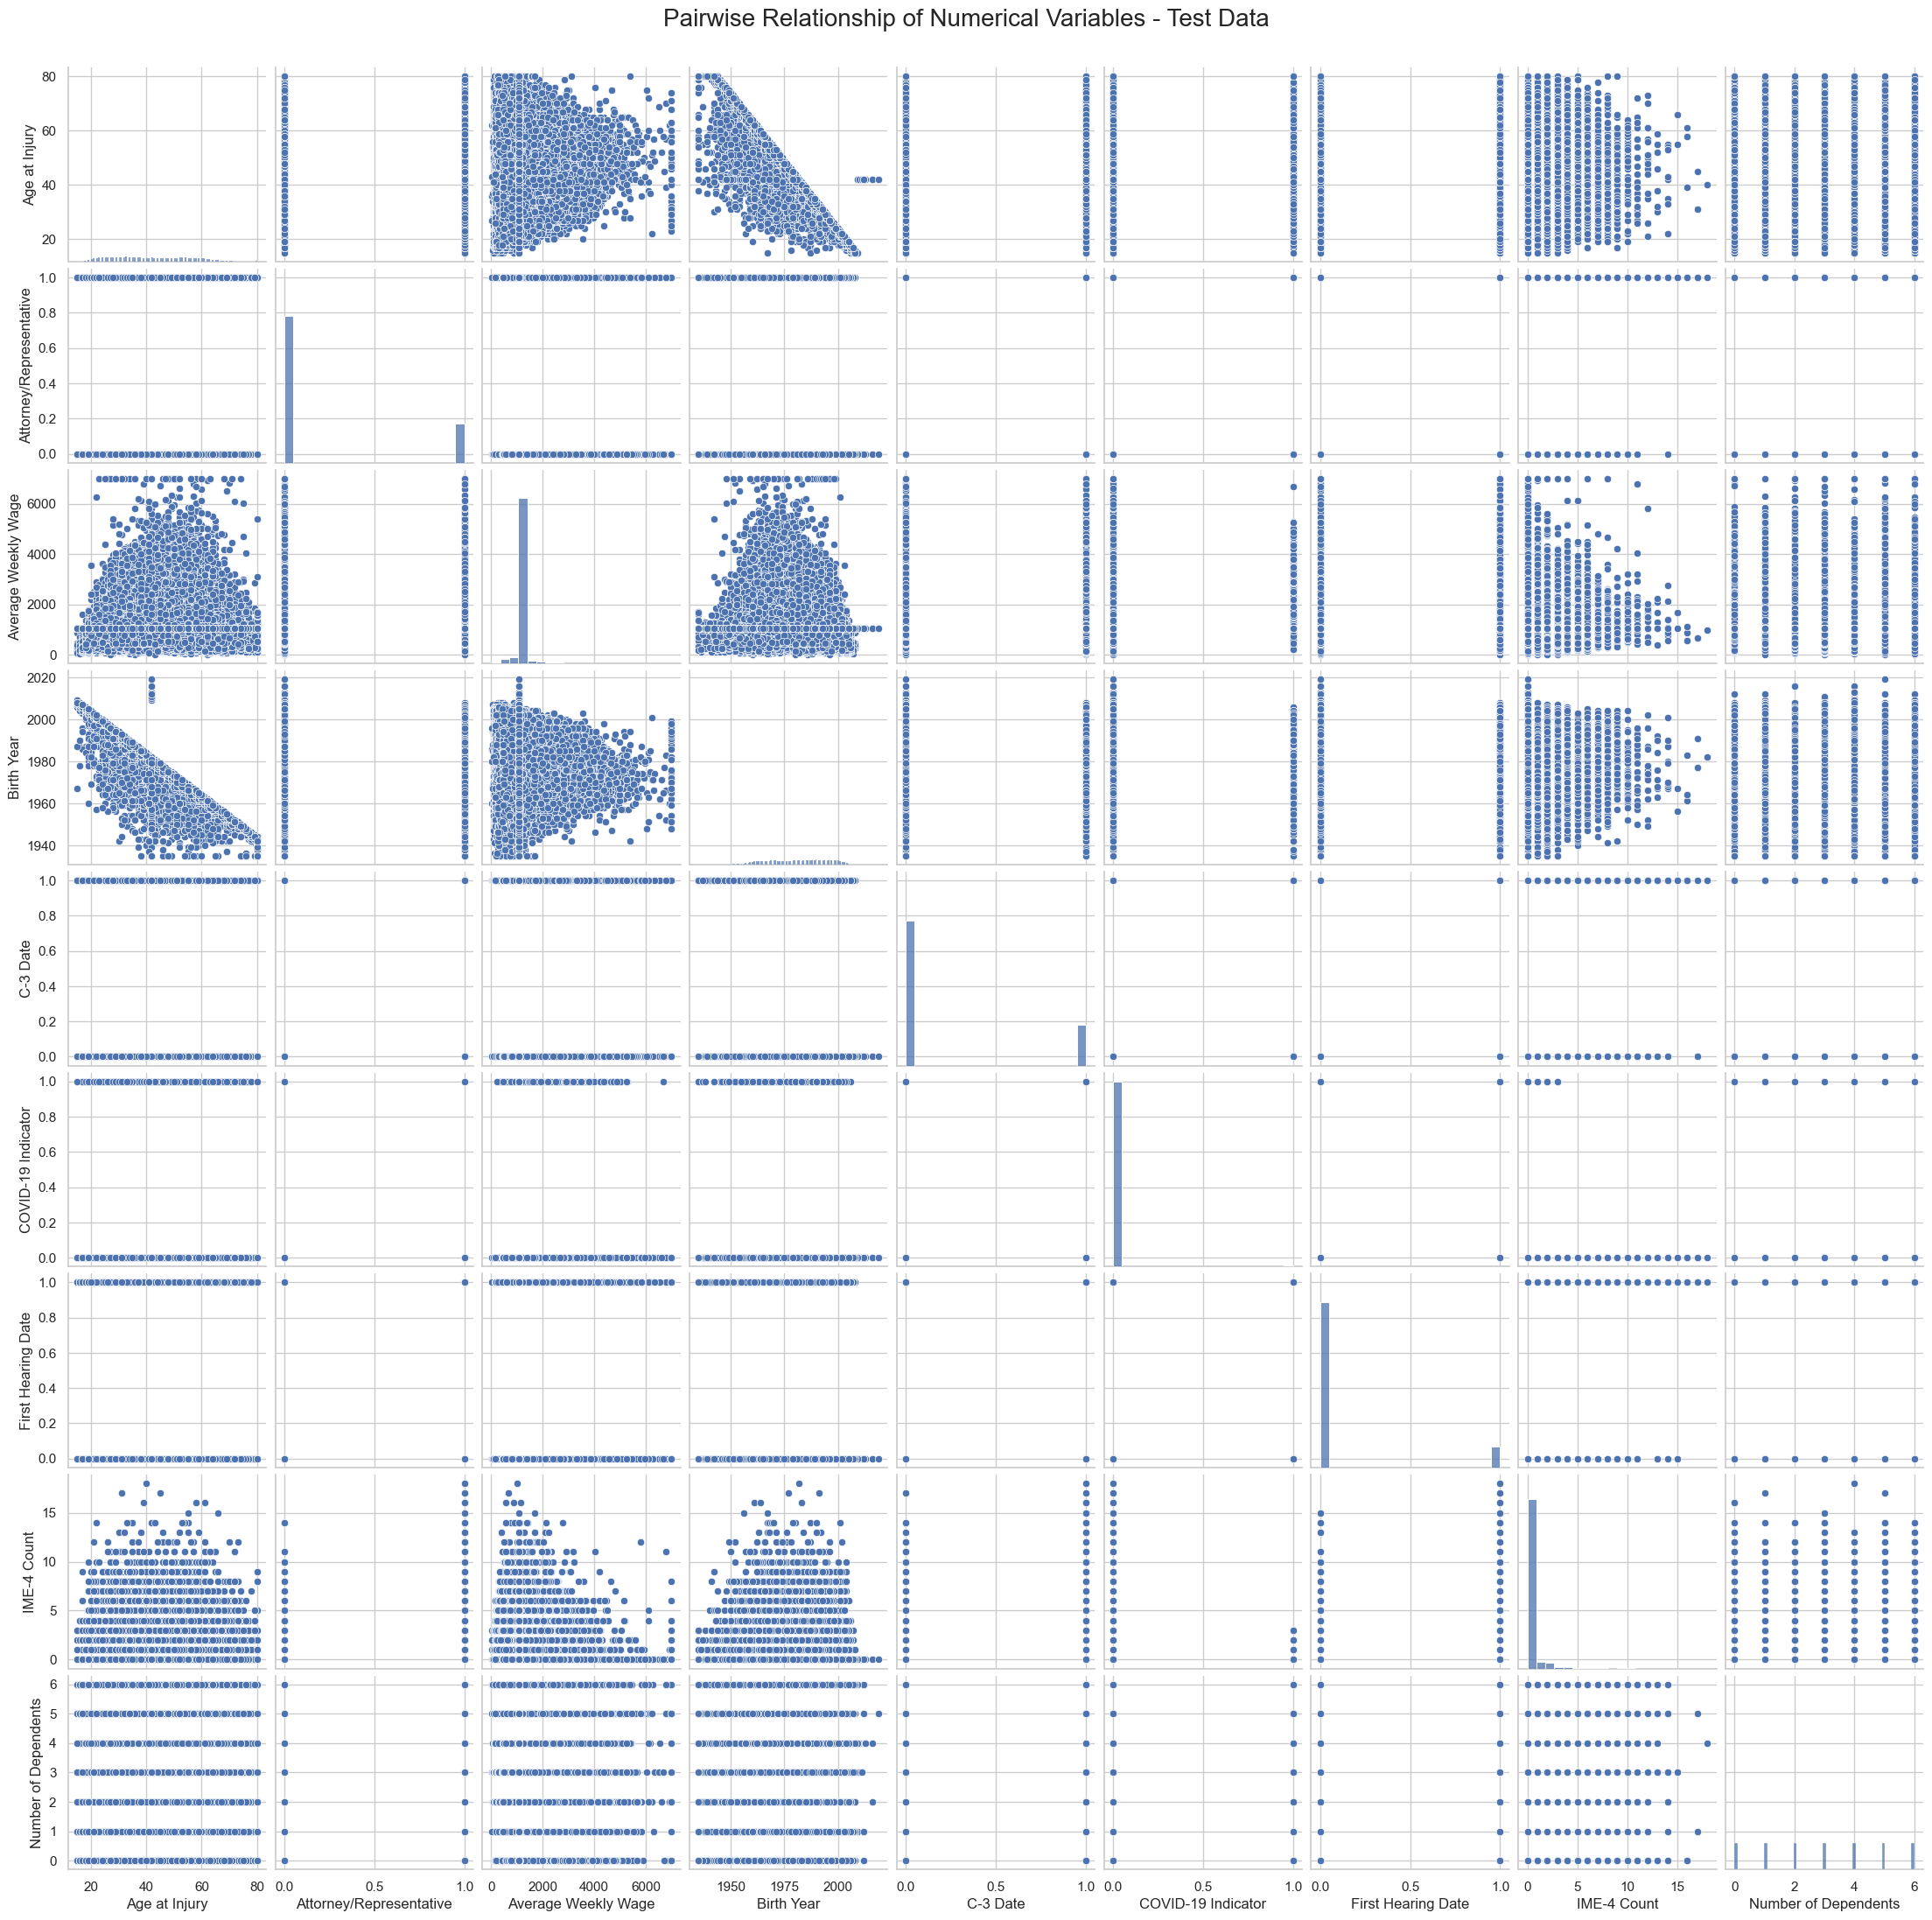

In [228]:
custom_palette = sns.color_palette("viridis", as_cmap=True)(np.linspace(0, 0.3, 100))

sns.set(style="whitegrid")
pairplot = sns.pairplot(numerical_feats_test, diag_kind="hist",
                        palette=custom_palette, plot_kws={'cmap': 'viridis'})
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables - Test Data", fontsize=20)

plt.show()

Relationships observed after preprocessing are not vastly different than those we saw in the EDA. The shapes and scales of the data are easier to visualize now that extreme outliers have been removed.  
We see a small group of multivariate outliers when examining Birth Year against Age at Injury. These correspond to the 39 rows in the training data that were dropped because the imputed Age at Injury was less than 14 years old. As we can't drop rows in our test data, we will leave these values as is.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="exports">
    
# 2.6 CSV Formatting, Exports
 
</a>

In [231]:
#ensuring the rows that were dropped in training data are also dropped in validation
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]

In [232]:
#dropping features used to help with imputation (Imputed Age at Injury) to return df to original shape 
X_train.drop('Imputed Age at Injury', axis = 1, inplace = True)
X_val.drop('Imputed Age at Injury', axis = 1, inplace = True)

In [233]:
X_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5785935,2021-08-05,49.0,0,2021-08-10,1,744.06,1971.0,2021-08-10,1,PROPERTY AND CASUALTY,...,MANUFACTURING,4,29.0,ON SAME LEVEL,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA,6.0,1
6090033,2022-09-14,56.0,0,2022-09-21,1,845.29,1966.0,2022-09-21,1,EVEREST PREMIER INSURANCE,...,TRANSPORTATION AND WAREHOUSING,4,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,25.0,SOFT TISSUE,5.0,1
6136197,2022-11-07,48.0,0,2022-11-18,0,1070.12,1974.0,2022-11-18,0,CHARTER OAK FIRE INS CO,...,TRANSPORTATION AND WAREHOUSING,3,68.0,STATIONARY OBJECT,10.0,CONTUSION,12.0,BRAIN,2.0,0
6019545,2020-09-02,55.0,0,2022-06-21,0,1070.12,1965.0,2022-06-21,1,NEW HAMPSHIRE INSURANCE CO,...,CONSTRUCTION,0,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,2.0,0
5792247,2021-08-13,53.0,0,2021-08-18,1,668.08,1968.0,2021-08-18,1,STATE INSURANCE FUND,...,RETAIL TRADE,1,29.0,ON SAME LEVEL,10.0,CONTUSION,18.0,SOFT TISSUE,6.0,1


In [234]:
X_val.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5947783,2022-03-14,51.0,0,2022-03-22,0,1070.12,1970.0,2022-03-22,1,CANTON CENTRAL SCHOOL DISTRICT,...,EDUCATIONAL SERVICES,1,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,-9.0,MULTIPLE,2.0,0
6150876,2022-12-02,61.0,0,2022-12-09,1,1070.12,1961.0,2022-12-09,0,STATE INSURANCE FUND,...,TRANSPORTATION AND WAREHOUSING,1,56.0,LIFTING,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),2.0,1
5397365,2011-06-14,50.0,0,2020-01-08,1,1070.12,1961.0,2020-01-07,0,COMMERCE AND INDUSTRY INS CO,...,HEALTH CARE AND SOCIAL ASSISTANCE,4,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,55.0,ANKLE,1.0,0
6077399,2022-02-07,54.0,0,2022-09-07,1,1502.50,1967.0,2022-09-13,1,STATE INSURANCE FUND,...,HEALTH CARE AND SOCIAL ASSISTANCE,4,32.0,ON ICE OR SNOW,10.0,CONTUSION,-9.0,MULTIPLE,0.0,1
5945251,2022-03-15,35.0,0,2022-03-16,0,1070.12,1986.0,2022-03-16,0,SAFETY NATIONAL CASUALTY CORP,...,HEALTH CARE AND SOCIAL ASSISTANCE,4,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,41.0,UPPER BACK AREA,0.0,0


In [235]:
#checking the shape of X_train, X_val, y_train, y_val to make sure they match
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print('data_test shape:', df_test_preprocess.shape)

X_train shape: (459181, 28)
y_train shape: (459181,)
X_val shape: (114796, 28)
y_val shape: (114796,)
data_test shape: (387975, 28)


In [236]:
#rejoining X and y to ensure indices are still matched when we re-import
# Horizontal stacking (columns)
df_train_preprocess = pd.concat([X_train, y_train], axis=1)
df_train_preprocess.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5785935,2021-08-05,49.0,0,2021-08-10,1,744.06,1971.0,2021-08-10,1,PROPERTY AND CASUALTY,...,4,29.0,ON SAME LEVEL,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA,6.0,1,4
6090033,2022-09-14,56.0,0,2022-09-21,1,845.29,1966.0,2022-09-21,1,EVEREST PREMIER INSURANCE,...,4,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,25.0,SOFT TISSUE,5.0,1,3
6136197,2022-11-07,48.0,0,2022-11-18,0,1070.12,1974.0,2022-11-18,0,CHARTER OAK FIRE INS CO,...,3,68.0,STATIONARY OBJECT,10.0,CONTUSION,12.0,BRAIN,2.0,0,2
6019545,2020-09-02,55.0,0,2022-06-21,0,1070.12,1965.0,2022-06-21,1,NEW HAMPSHIRE INSURANCE CO,...,0,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,2.0,0,2
5792247,2021-08-13,53.0,0,2021-08-18,1,668.08,1968.0,2021-08-18,1,STATE INSURANCE FUND,...,1,29.0,ON SAME LEVEL,10.0,CONTUSION,18.0,SOFT TISSUE,6.0,1,3


In [237]:
df_val_preprocess = pd.concat([X_val, y_val], axis=1)
df_val_preprocess.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5947783,2022-03-14,51.0,0,2022-03-22,0,1070.12,1970.0,2022-03-22,1,CANTON CENTRAL SCHOOL DISTRICT,...,1,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,-9.0,MULTIPLE,2.0,0,3
6150876,2022-12-02,61.0,0,2022-12-09,1,1070.12,1961.0,2022-12-09,0,STATE INSURANCE FUND,...,1,56.0,LIFTING,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),2.0,1,4
5397365,2011-06-14,50.0,0,2020-01-08,1,1070.12,1961.0,2020-01-07,0,COMMERCE AND INDUSTRY INS CO,...,4,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,55.0,ANKLE,1.0,0,4
6077399,2022-02-07,54.0,0,2022-09-07,1,1502.50,1967.0,2022-09-13,1,STATE INSURANCE FUND,...,4,32.0,ON ICE OR SNOW,10.0,CONTUSION,-9.0,MULTIPLE,0.0,1,5
5945251,2022-03-15,35.0,0,2022-03-16,0,1070.12,1986.0,2022-03-16,0,SAFETY NATIONAL CASUALTY CORP,...,4,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,41.0,UPPER BACK AREA,0.0,0,2


In [238]:
print('Train Data Shape:', df_train_preprocess.shape)
print('Validation Data Shape:', df_val_preprocess.shape)
print('Test Data Shape:', df_test_preprocess.shape)

Train Data Shape: (459181, 29)
Validation Data Shape: (114796, 29)
Test Data Shape: (387975, 28)


In [239]:
df_train_preprocess.to_csv('df_train_preprocess.csv', index = True)
df_val_preprocess.to_csv('df_val_preprocess.csv', index = True)
df_test_preprocess.to_csv('df_test_preprocess.csv', index = True)